# PEC 2 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2024/2025

### ALUMNO

Fernández Santos, Alberto

### EJERCICIO 1

Evalúa al menos 2 modelos de clasificación supervisada (SVC, Regresor Logístico, KNN Classifier... por ejemplo) haciendo 2 tipos de Cross-Validation sobre cada uno de ellos. En el ejercicio busca una combinación de hiperarámetros óptima (con Grid Search o Randomized Search) para cada uno de ellos. Razonar cual sería el modelo que mejor generaliza los resultados, entre los entrenamientos realizados. Mostrar gráficamente los resultados y explicar el scoring o métrica escogida.

Utilizar el conjunto de datos winequality-red.csv, este dataset contiene para los vinos de la denominación de origen Minho una serie de métricas donde se caracterizan diferentes tipos de vinos. Entre estos valores se encuentran el pH, su densidad, el nivel de alcohol o su calidad (que van potencialmente desde 1 hasta 8).

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

myfile='datasets/winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

print(wine.head())
print(wine.columns)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Evalúa al menos 2 modelos de clasificación supervisada (SVC, Regresor Logístico, KNN Classifier... por ejemplo) haciendo 2 tipos de Cross-Validation sobre cada uno de ellos. En el ejercicio busca una combinación de hiperarámetros óptima (con Grid Search o Randomized Search) para cada uno de ellos.**

In [1429]:
# Guardamos las features en la variable X
X = wine.drop(columns=['quality'], inplace=False)

# Guardamos los targets en la variable y
y = wine.quality

In [1430]:
# Visualizamos 5 primeras filas de la matriz de diseño
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [1431]:
# Visualizamos 5 primeras filas de la variable target
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [1432]:
# Copiamos el dataset original en un df para evitar modificar valores originales
df = wine.copy()

# Mostramos 5 primeras filas del df
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<u>Paso 1: PRESENTACIÓN DEL DATASET

In [1434]:
# Mostramos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1435]:
# Mostramos dimensiones del dataset
df.shape

(1599, 12)

In [1436]:
# Verificamos presencia de valores NaN en el dataset
if df.isnull().sum().sum() == 0:
    print('No existen valores NaN en el dataset.')
else:
    print(f'Existen {df.isnull().sum().sum()} valores NaN en el dataset.')

No existen valores NaN en el dataset.


Presentación del dataset:

- El dataset `wine` registra 11 características de distintas muestras de vino obtenidas mediante un análisis químico.
- El dataset contiene un total de 1599 muestras de vino y 11 características:

    - Las 11 features son variables numéricas tipo float.
    - La variable target del dataset se trata de una variable categórica ordinal (1, 2, 3, 4, 5, 6, 7 u 8) e indica la calidad del vino. El dataset solo muestra calidades de vino entre 3 y 8.
      
- El dataset no presenta valores NaN

<u>Paso 2: ANÁLISIS EXPLORATORIO DE LOS DATOS

In [1439]:
# Mostramos los principales estadísticos de las variables numéricas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [1440]:
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Función para crear histogramas para cada característica del dataset
def plot_histograms(dataframe):
    num_features = len(dataframe.columns)
    cols = 3  # Número de columnas en el grid
    rows = (num_features // cols) + (num_features % cols > 0)  # Calcular filas necesarias

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))  # Tamaño del grid
    axes = axes.flatten()  # Aplanar la matriz de ejes

    for i, column in enumerate(dataframe.columns):
        sns.histplot(dataframe[column], kde=False, bins=20, ax=axes[i], color="blue")
        axes[i].set_title(f'Histograma de {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frecuencia')

    # Ocultar cualquier gráfico extra si hay menos features que subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

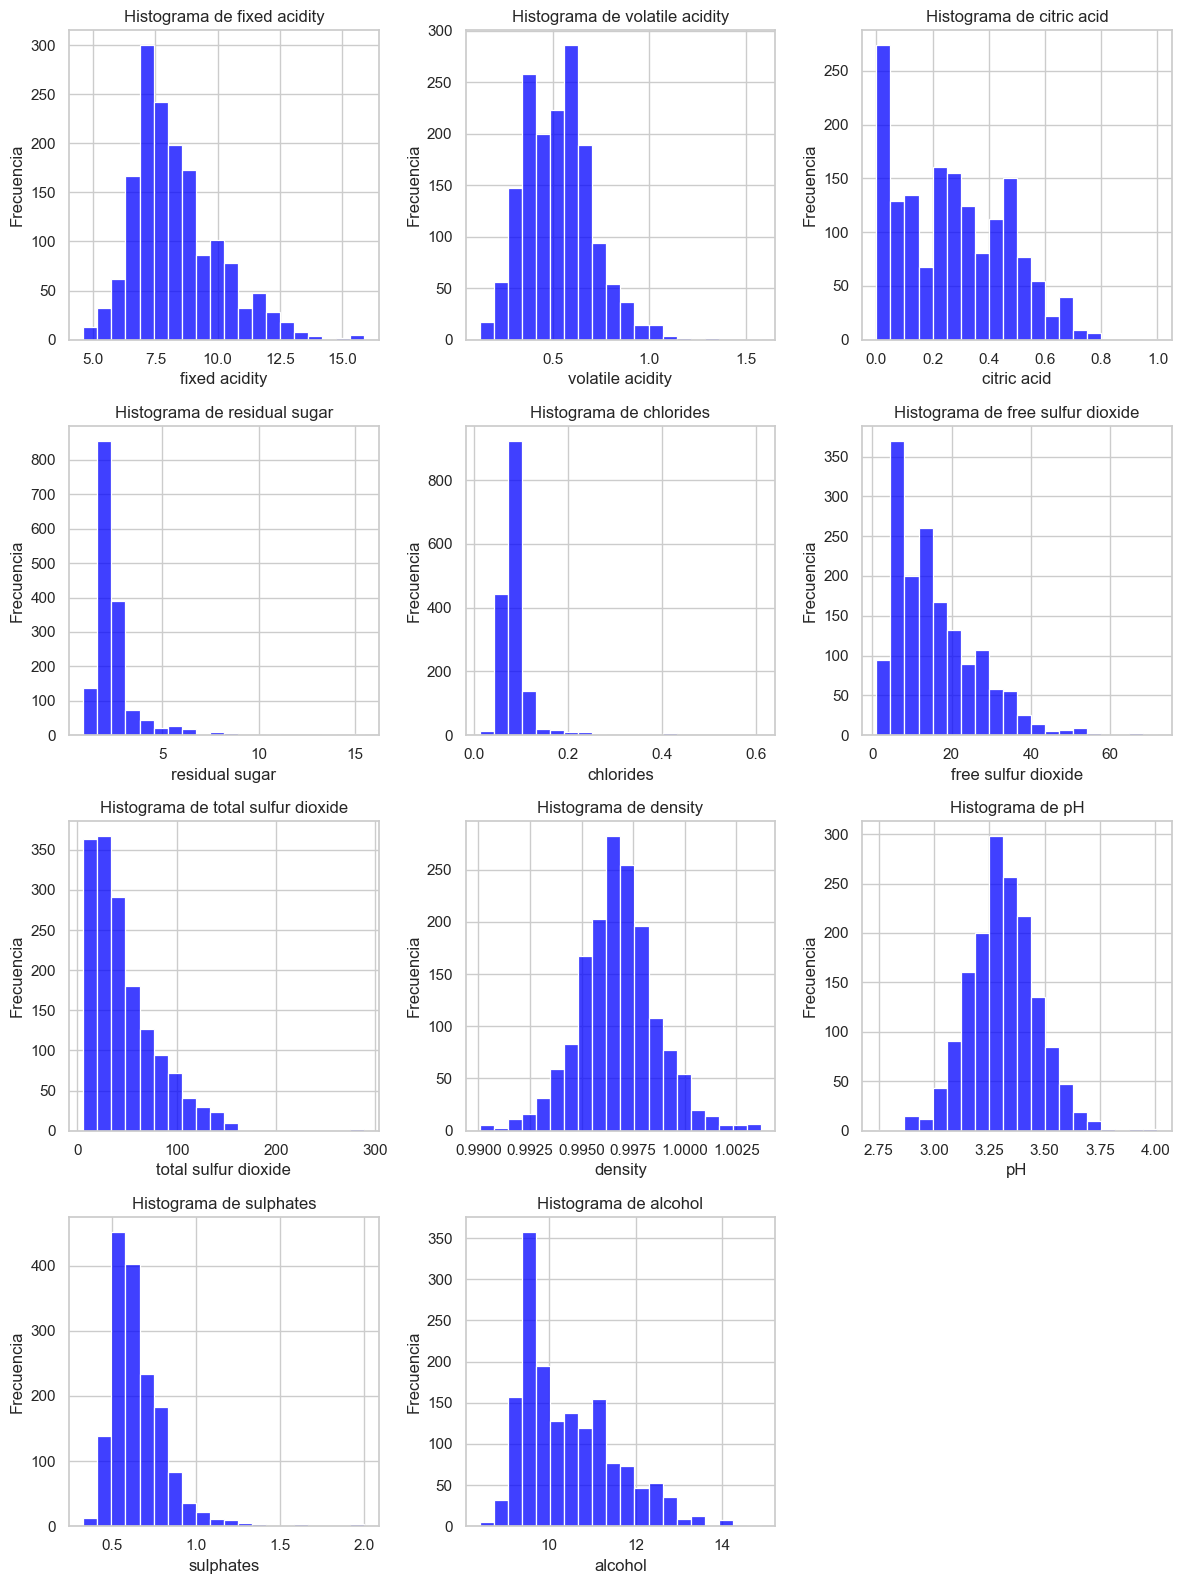

In [1441]:
# Graficamos histogramas de las features
plot_histograms(X)

In [1442]:
from scipy.stats import shapiro

# Funcion para comprobar si las features tienen una distribución normal
def check_normality(dataframe, alpha=0.05):
    # Filtrar solo columnas numéricas
    numeric_columns = dataframe.select_dtypes(include=['number'])

    # Inicializacion de check all normal
    all_normal = True

    # Iterar por cada columna numérica y aplicar la prueba de Shapiro-Wilk
    for col in numeric_columns.columns:
        stat, p = shapiro(numeric_columns[col].dropna())  # Ignorar valores NaN
        if p <= alpha:
            # Si alguna columna no es normal, devuelve False
            print(f"Feature '{col}' no se ajusta a una distribucion normal: p-valor = {p:.5f}")
            all_normal = False

    if all_normal:
        # Si todas las columnas pasan la prueba, devuelve True
        print("Todas las columnas numéricas son normales.")

In [1443]:
# Verificamos condicion de normalidad en las features
check_normality(X)

Feature 'fixed acidity' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'volatile acidity' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'citric acid' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'residual sugar' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'chlorides' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'free sulfur dioxide' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'total sulfur dioxide' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'density' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'pH' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'sulphates' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'alcohol' no se ajusta a una distribucion normal: p-valor = 0.00000


In [1444]:
# Función para crear diagramas de caja para cada característica del dataset
def plot_boxplots(dataframe):
    num_features = len(dataframe.columns)
    cols = 3  # Número de columnas en el grid
    rows = (num_features // cols) + (num_features % cols > 0)  # Calcular filas necesarias

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))  # Tamaño del grid
    axes = axes.flatten()  # Aplanar la matriz de ejes

    for i, column in enumerate(dataframe.columns):
        sns.boxplot(data=dataframe[column], ax=axes[i], color="skyblue")
        axes[i].set_title(f'Diagrama de Caja: {column}')
        axes[i].set_xlabel(column)

    # Ocultar cualquier gráfico extra si hay menos features que subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

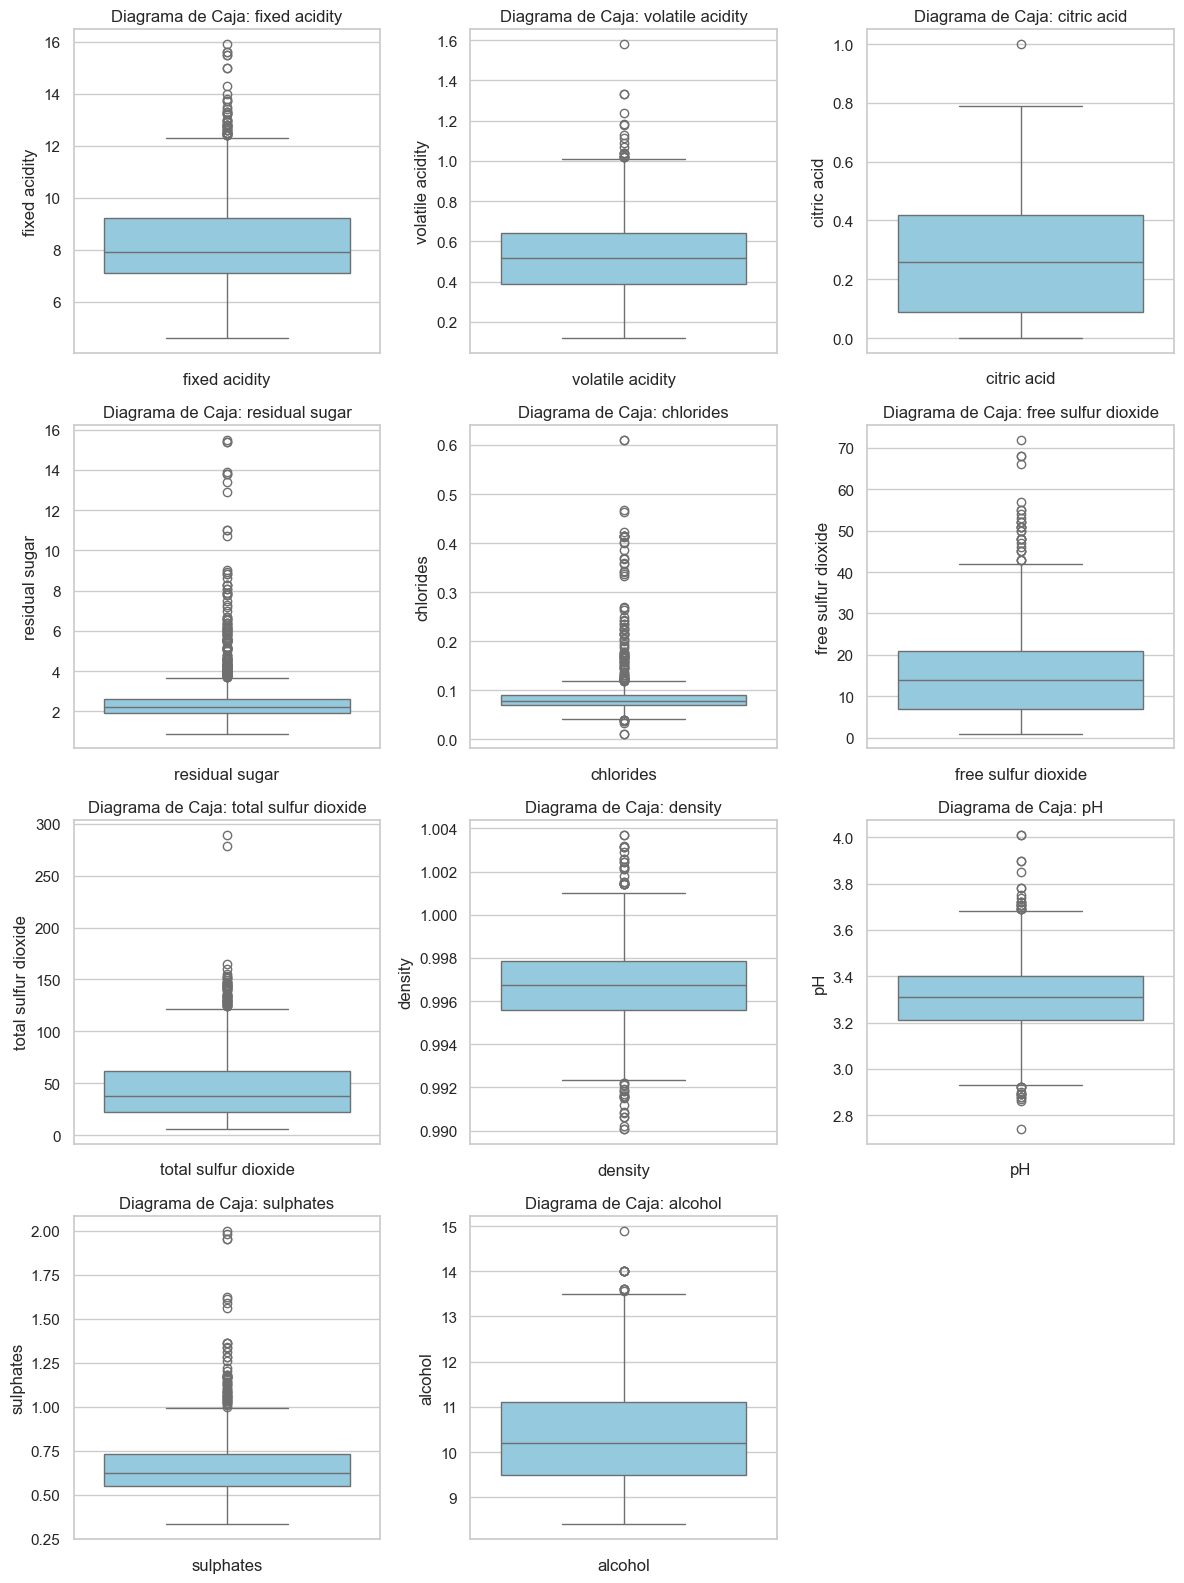

In [1445]:
# Graficamos diagramas de caja de las features
plot_boxplots(X)

In [1446]:
# Definimos función para contar outliers
def count_outliers(dataframe, feature):
    # Calcular los cuartiles y el IQR
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]

    # Retornar el número de outliers
    return len(outliers)

In [1447]:
# Contamos el número de outliers presente en cada feature
outliers = {}
for feature in X.columns.to_list():
    outliers[feature] = count_outliers(X, feature)

print(outliers)

{'fixed acidity': 49, 'volatile acidity': 19, 'citric acid': 1, 'residual sugar': 155, 'chlorides': 112, 'free sulfur dioxide': 30, 'total sulfur dioxide': 55, 'density': 45, 'pH': 35, 'sulphates': 59, 'alcohol': 13}


In [1448]:
# Contamos el número total de outliers
sum(outliers.values())

573

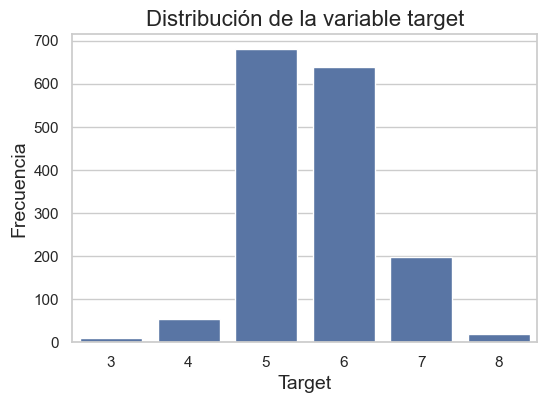

In [1449]:
# Graficamos diagrama de barras para la variable target

# Crear el diagrama de barras
plt.figure(figsize=(6, 4))
sns.countplot(x=y)

# Etiquetas y título
plt.title('Distribución de la variable target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Conclusiones extraídas del análisis exploratorio:

- Las features presentan distintas escalas por lo que será necesario normalizar los valores para evitar que el modelo esté sesgado.
- Las features no se ajustan a una distribución normal y por lo tanto, no se puede emplear StandardScaler como método de normalización.
- Se observa la presencia de 573 valores outliers entre todas las features. MinMaxScaler no es recomendado en este caso debido a que los valores se pueden comprimir en un rango muy pequeño, lo que puede empeorar el rendimiento del modelo. Se recomienda usar RobusScaler ya que es más resistente a outliers.
- Existe desbalanceo entre las 8 clases de la variable target, siendo las clases 5 y 6 las mayoritarias y las demás las minoritarias. Por lo tanto:
    - Se debe considerar este desbalanceo en la creación de los conjuntos TRAIN y TEST mediante la estratificación.
    - Es importante elegir modelos y métricas de evaluación que manejen bien el desbalance para evitar que el modelo esté sesgado hacia las clases mayoritarias.
        - Modelos de clasificación recomendados:
            - Random Forest con parámetro `class_weight='balanced'`
            - Regresión Logística Multinomial con parámetros `multi_class='multinomial'`, `class_weight='balanced'` y `solver='lbfgs'`
            - SVM con parámetro `class_weight='balanced'`
        - Métrica de evaluación:
            - No se recomienda emplear `accuracy` como métrica de rendimiento ya que podría dar una falsa sensación de buen desempeño (modelo sesgado a predecir correctamente la clases mayoritarias pero incorrectamente las minoritarias).
            - Dado que el objetivo es predecir la calidad del vino, ya sea de las clases mayoritarias o minoritarias indistintamente, se recomienda emplear curva ROC-AUC o Precision-Recall como métricas de rendimiento.

<u>Paso 3: TRANSFORMACIÓN Y LIMPIEZA DE LOS DATOS

In [1452]:
from sklearn.model_selection import train_test_split

# Generamos los conjuntos TRAIN y TEST teniendo en cuenta el desbalanceo de la variable target mediante la estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [1453]:
from sklearn.preprocessing import RobustScaler

# Normalizamos los datos mediante el método RobustScaler

# Instanciamos el scaler
scaler = RobustScaler()

# Entrenamos el scaler con el conjunto TRAIN y normalizamos el conjunto TRAIN
X_train_scaled = scaler.fit_transform(X_train)

# Normalizamos el conjunto TEST
X_test_scaled = scaler.transform(X_test)

<u>Paso 4: MODELADO</u>

A continuación, se realizarán las siguientes acciones:

- Entrenamiento de modelos de clasificación `Random Forest` y `SVC`, teniendo en cuenta en ambos el desbalanceo de clases mediante los parámetros `class_weight="balanced"`.
- Evaluación de los modelos:
    - Métrica empleada `ROC-AUC One vs Rest` al tratarse de un clasificador multiclase con clases desbalanceadas.
    - Dos técnicas de Cross-Validation (`StratifiedKFold` y `RepeatedStratifiedKFold`) para cada uno de los modelos.
- Optimización de hiperparámetros mediante `GridSearch` para cada uno de los dos modelos.

In [750]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instanciamos modelo Random Forest
model_RF = RandomForestClassifier(random_state=42)

# Instanciamos modelo SVC
model_SVC = SVC(probability=True, random_state=42) 

In [751]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Definimos métodos de Cross-Validation

# StratifiedKFold con 3 folds
cv_SKF = 3 # Según la documentación oficial, GridSearchCV usa por defecto la estratificación para un modelo de clasificación multiclase

# RepeatedStratifiedKFold con 3 folds y 5 repeticiones
cv_RSKF = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=42)

In [752]:
# Definimos malla de hiperparámetros para modelo RF
hyperparam_grid_RF = {
                    'n_estimators':[100, 500, 1000, 1500], # Número de árboles en el bosque
                    'max_features':[2,6,None], # Número máximo de características consideradas para división de un nodo
                    'max_depth': [20, 30, None],  # Profundidad de cada árbol
                    'bootstrap': [True, False], # Si se usa muestreo con reemplazo o no
                    'class_weight': ['balanced'], # Pesos de las clases, útil en problemas desbalanceados
}

# Definimos malla de hiperparámetros para modelo SVC
hyperparam_grid_SVC = {
                    'C': [0.1, 1, 10],  # Parámetro de regularización
                    'kernel': ['rbf', 'poly'],  # Tipos de núcleo
                    'degree': [2,3], # Grado del polinómio
                    'class_weight': ['balanced'], # Pesos de las clases, útil en problemas desbalanceados
                    'gamma': ['scale', 'auto']  # Parámetro gamma para control de complejidad y generalización
}

In [753]:
from sklearn.model_selection import GridSearchCV

# Modelo RF
# Instanciamos GridSearchCV con StratifiedKFold
gs_cv_SKF_RF = GridSearchCV(estimator=model_RF,
                            param_grid=hyperparam_grid_RF,
                            cv=cv_SKF,
                            scoring='roc_auc_ovr',
                            verbose=2,
                            n_jobs=-1,
                            return_train_score=True
)

# Entrenamos modelo con StratifiedKFold
gs_cv_SKF_RF.fit(X_train_scaled, y_train)

# Instanciamos GridSearchCV con RepeatedStratifiedKFold
gs_cv_RSKF_RF = GridSearchCV(estimator=model_RF,
                            param_grid=hyperparam_grid_RF,
                            cv=cv_RSKF,
                            scoring='roc_auc_ovr',
                            verbose=2,
                            n_jobs=-1,
                            return_train_score=True
                            )

# Entrenamos modelo con RepeatedStratifiedKFold
gs_cv_RSKF_RF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 15 folds for each of 72 candidates, totalling 1080 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=42),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced'],
                         'max_depth': [20, 30, None],
                         'max_features': [2, 6, None],
                         'n_estimators': [100, 500, 1000, 1500]},
             return_train_score=True, scoring='roc_auc_ovr', verbose=2)

In [754]:
# Modelo SVC
# Instanciamos GridSearchCV con StratifiedKFold
gs_cv_SKF_SVC = GridSearchCV(estimator=model_SVC,
                            param_grid=hyperparam_grid_SVC,
                            cv=cv_SKF,
                            scoring='roc_auc_ovr',
                            verbose=2,
                            n_jobs=-1,
                            return_train_score=True
)

# Entrenamos modelo con StratifiedKFold
gs_cv_SKF_SVC.fit(X_train_scaled, y_train)

# Instanciamos GridSearchCV con RepeatedStratifiedKFold
gs_cv_RSKF_SVC = GridSearchCV(estimator=model_SVC,
                            param_grid=hyperparam_grid_SVC,
                            cv=cv_RSKF,
                            scoring='roc_auc_ovr',
                            verbose=2,
                            n_jobs=-1,
                            return_train_score=True
                            )

# Entrenamos modelo con RepeatedStratifiedKFold
gs_cv_RSKF_SVC.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 15 folds for each of 24 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=42),
             estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'degree': [2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, scoring='roc_auc_ovr', verbose=2)

In [755]:
# Instanciamos los mejores modelos RF obtenidos mediante GridSearch
best_RF_SKF = gs_cv_SKF_RF.best_estimator_
best_RF_RSKF = gs_cv_RSKF_RF.best_estimator_

In [756]:
# Instanciamos los mejores modelos SVC obtenidos mediante GridSearch
best_SVC_SKF = gs_cv_SKF_SVC.best_estimator_
best_SVC_RSKF = gs_cv_RSKF_SVC.best_estimator_

**Razonar cual sería el modelo que mejor generaliza los resultados, entre los entrenamientos realizados. Mostrar gráficamente los resultados y explicar el scoring o métrica escogida.**

<u>Paso 4: EVALUCIÓN

<mark>Modelo RF

En primer lugar, mostramos los mejores hiperparámetros encontrados mediante `GridSearch` y el score obtenido mediante la métrica de evaluación `roc_auc_ovr` y la técnica de validación cruzada con `StratifiedKFold` y `RepeatedStratifiedKFold`:

In [758]:
# Obtenemos mejores parámetros del modelo RF con StratifiedKFold
gs_cv_SKF_RF.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'max_depth': 20,
 'max_features': 2,
 'n_estimators': 500}

In [759]:
# Obtenemos mejores parámetros del modelo RF con RepeatedStratifiedKFold
gs_cv_RSKF_RF.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 30,
 'max_features': 2,
 'n_estimators': 1500}

Interpretación de resultados:

Como se puede observar, la elección de hiperparámetros es muy sensible al método de validación cruzada empleado. 3 de 5 hiperparámetros probados mediante GridSearchCV cambian para el modelo evaluado mediante StratifiedKFold en comparación con RepeatedStratifiedKFold. De esta forma, se verifica en la práctica la sensibilidad a la hora de realizar la partición de los datos. Como posible mejora para convergencia de GridSearch, se podría aumentar el número de folds y repeticiones en el proceso de validación cruzada a costa de aumentar el coste computacional de entrenamiento del modelo.

In [1188]:
# Obtenemos score (roc_auc_ovr) del modelo RF con StratifiedKFold
gs_cv_SKF_RF.best_score_

0.8359666520577993

In [761]:
# Obtenemos score (roc_auc_ovr) del modelo RF con RepeatedStratifiedKFold
gs_cv_RSKF_RF.best_score_

0.8406831368024702

A continuación, evaluamos los dos modelos RF entrenados con el conjunto de TEST:

In [763]:
from sklearn.metrics import roc_auc_score

# Predecir las probabilidades para el conjunto de prueba
y_prob_SKF = best_RF_SKF.predict_proba(X_test_scaled)
y_prob_RSKF = best_RF_RSKF.predict_proba(X_test_scaled)

# Calcular el ROC AUC promedio de cada modelo
roc_auc_test_SKF = roc_auc_score(y_test, y_prob_SKF, multi_class='ovr')
print("ROC AUC en el conjunto de prueba con StratifiedKFold:", roc_auc_test_SKF)
roc_auc_test_RSKF = roc_auc_score(y_test, y_prob_RSKF, multi_class='ovr')
print("ROC AUC en el conjunto de prueba con RepeatedStratifiedKFold:", roc_auc_test_RSKF)

ROC AUC en el conjunto de prueba con StratifiedKFold: 0.8009134518707522
ROC AUC en el conjunto de prueba con RepeatedStratifiedKFold: 0.8343167996431337


In [764]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc_subplots(y_test, y_prob, class_labels):
    """
    Dibuja la curva ROC de cada clase en un gráfico separado (subplots).
    
    Parámetros:
    - y_test: Vector con las etiquetas verdaderas (shape: (n_samples,))
    - y_prob: Matriz de probabilidades predichas (shape: (n_samples, n_classes))
    - class_labels: Lista con los nombres de las clases (longitud: n_classes)
    
    Retorna:
    - Un conjunto de gráficos con la curva ROC de cada clase.
    """
    
    n_classes = len(class_labels)  # Número de clases
    cols = 3  # Número de columnas en la figura
    rows = int(np.ceil(n_classes / cols))  # Calcular filas dinámicamente

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Crear figura
    axes = axes.flatten()  # Convertir en lista unidimensional
    
    for i, c in enumerate(class_labels):
        ax = axes[i]  # Obtener el subplot correspondiente
        
        # Convertimos y_test a formato binario (One-vs-Rest)
        y_bin = (y_test == c).astype(int)
        
        # Calculamos la Curva ROC
        fpr, tpr, _ = roc_curve(y_bin, y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        
        # Dibujamos la curva ROC
        ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        ax.plot([0, 1], [0, 1], 'k--')  # Línea diagonal (clasificador aleatorio)
        
        # Configuración de cada subgráfico
        ax.set_xlabel("FPR")
        ax.set_ylabel("TPR")
        ax.set_title(f"ROC - Clase {c}")
        ax.legend(loc="lower right")
        ax.grid(True)

    # Eliminar gráficos vacíos si hay menos de `rows * cols`
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()

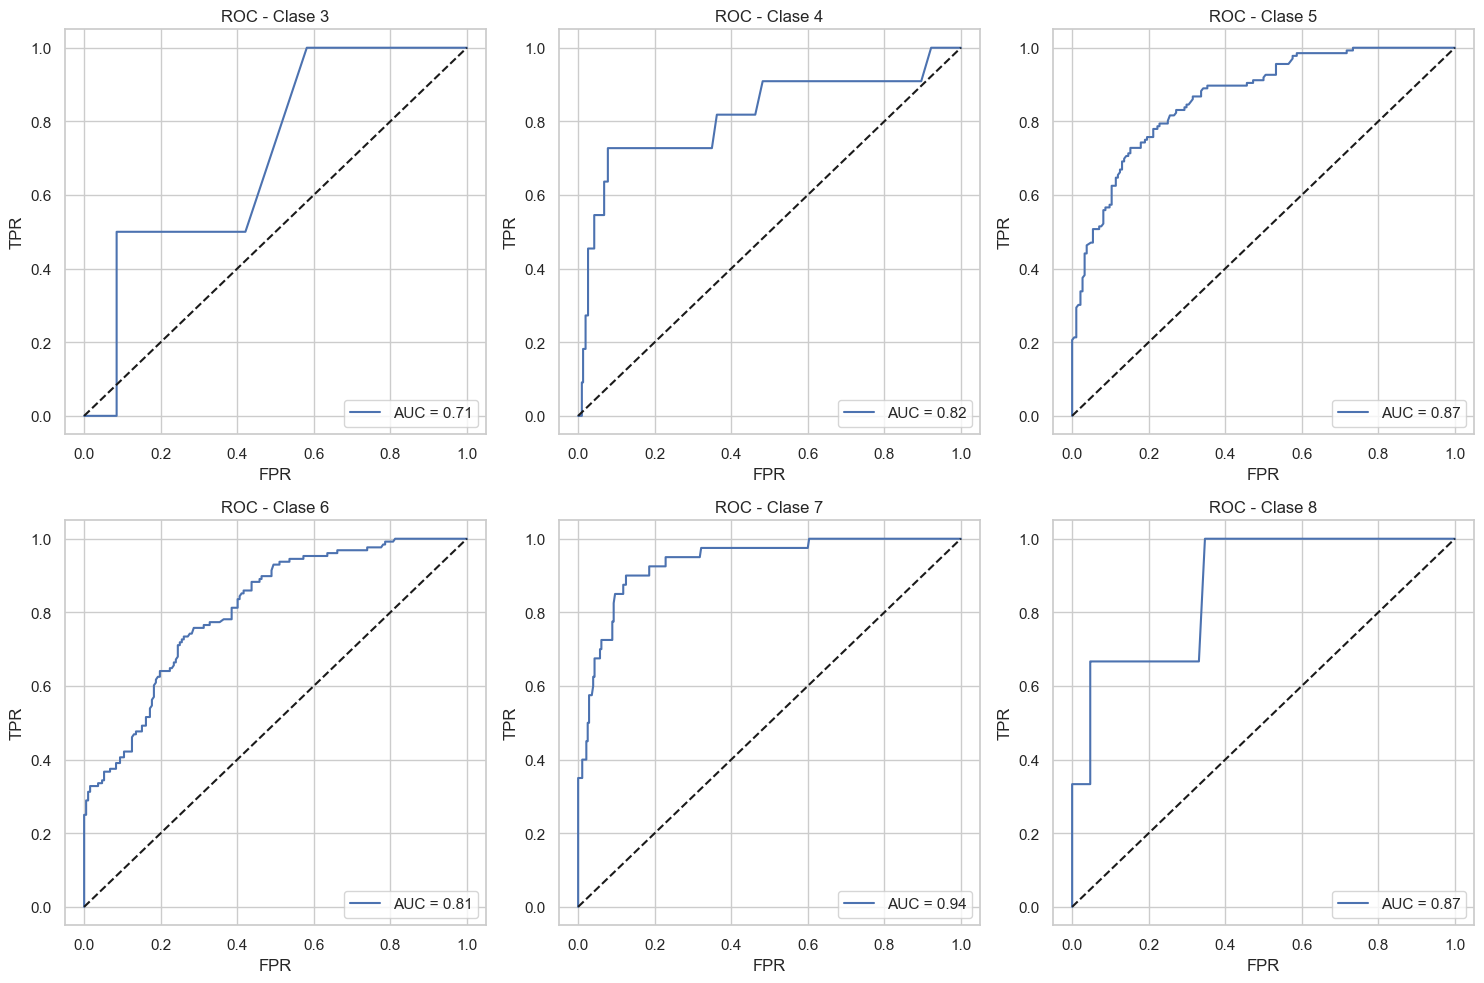

In [765]:
# Graficamos curvas ROC-AUC de cada clase del dataset
plot_multiclass_roc_subplots(y_test, y_prob_RSKF, best_RF_RSKF.classes_)

In [766]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_labels):
    """
    Dibuja la matriz de confusión para un problema de clasificación multiclase.
    
    Parámetros:
    - y_true: Vector con las etiquetas verdaderas (shape: (n_samples,))
    - y_pred: Vector con las etiquetas predichas (shape: (n_samples,))
    - class_labels: Lista con los nombres de las clases (longitud: n_classes)
    
    Retorna:
    - Una visualización de la matriz de confusión con anotaciones.
    """
    
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Dibujamos la matriz usando Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=class_labels, yticklabels=class_labels)
    
    # Configuración del gráfico
    plt.xlabel("Predicción")
    plt.ylabel("Etiqueta Verdadera")
    plt.title("Matriz de Confusión")
    plt.show()

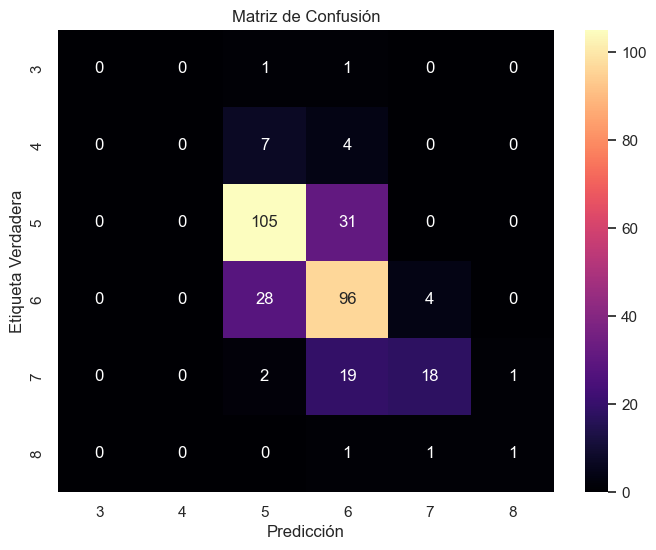

In [767]:
# Llamamos a la función con las etiquetas verdaderas y predichas
plot_confusion_matrix(y_test, best_RF_RSKF.predict(X_test_scaled), best_RF_RSKF.classes_)

Interpretación de resultados de modelos RandomFores:

- Métrica de rendimiento obtenida:
    - Conjunto TRAIN:
        - StratifiedKFold: `ROC-AUC=0.836`
        - RepeatedStratifiedKFold: `ROC-AUC=0.841`
    - Conjunto TEST:
        - StratifiedKFold: `ROC-AUC=0.801`
        - RepeatedStratifiedKFold: `ROC-AUC=0.834`
    - NOTA: al tratarse de un clasificador multiclase, el ROC-AUC obtenido es la media de los valores de ROC-AUC para cada clase. Analizando los valores de ROC-AUC global obtenidos, no se aprecia overfitting en el modelo debido a que los valores obtenidos en TEST son solo algo inferiores a los de TRAIN.

- Curvas ROC-AUC multiclase:
    - Se observa como las clases minoritarias tienen curvas más inestables debido a la presencia de menos instancias para formar la curva. Esto sugiere la necesidad de ingresar en el modelo un mayor número de muestras de las clases minoritarias para una mejor clasificación.
    - En términos generales, los valores de ROC-AUC obtenidos en cada clase son aceptables.

- Matriz de confusión multiclase:
    - En la matriz de confusión se observa claramente como el modelo está sesgado a predecir correctamente las clases mayoritarias (5 y 6) e incorrectamente las minoritarias (3, 4, 7 y 8).

<mark>Modelo SVC

En primer lugar, mostramos los mejores hiperparámetros encontrados mediante `GridSearch` y el score obtenido mediante la validación cruzada con `StratifiedKFold` y `RepeatedStratifiedKFold`:

In [769]:
# Obtenemos mejores parámetros del modelo SVC con StratifiedKFold
gs_cv_SKF_SVC.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf'}

In [770]:
# Obtenemos mejores parámetros del modelo SVC con RepeatedStratifiedKFold
gs_cv_RSKF_SVC.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'auto',
 'kernel': 'rbf'}

Interpretación de resultados:

En comparación con los modelos RandomForest creados anteriormente, se observa menos sensibilidad de elección de hiperparámetros mediante StratifiedKFold y RepeatedStratifiedKFold debido a que solo ha variado 1 hiperparámetro de los 5 probados mediante GridSearch.

In [771]:
# Obtenemos score (roc_auc_ovr) del modelo SVC con StratifiedKFold
gs_cv_SKF_SVC.best_score_

0.8027861297510418

In [772]:
# Obtenemos score (roc_auc_ovr) del modelo SVC con RepeatedStratifiedKFold
gs_cv_RSKF_SVC.best_score_

0.8087856251542715

In [773]:
# Predecir las probabilidades para el conjunto de prueba
y_prob_SKF = best_SVC_SKF.predict_proba(X_test_scaled)
y_prob_RSKF = best_SVC_RSKF.predict_proba(X_test_scaled)

# Calcular el ROC AUC promedio de cada modelo
roc_auc_test_SKF = roc_auc_score(y_test, y_prob_SKF, multi_class='ovr')
print("ROC AUC en el conjunto de prueba con StratifiedKFold:", roc_auc_test_SKF)
roc_auc_test_RSKF = roc_auc_score(y_test, y_prob_RSKF, multi_class='ovr')
print("ROC AUC en el conjunto de prueba con RepeatedStratifiedKFold:", roc_auc_test_RSKF)

ROC AUC en el conjunto de prueba con StratifiedKFold: 0.798497827640658
ROC AUC en el conjunto de prueba con RepeatedStratifiedKFold: 0.8028059580290802


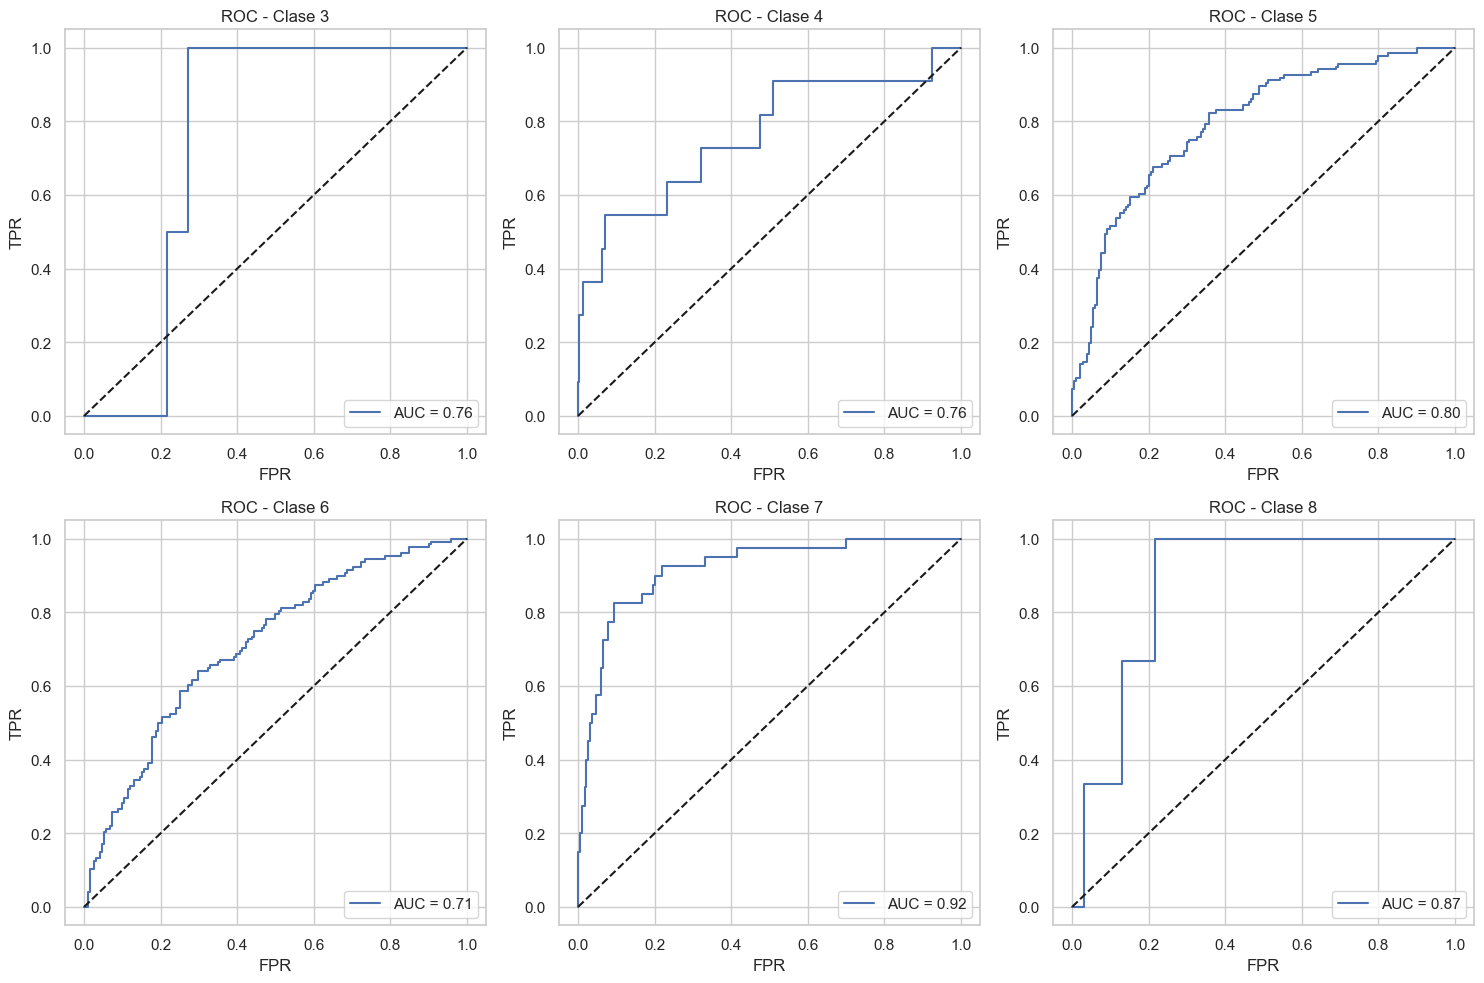

In [774]:
# Suponiendo que ya tienes y_test y y_prob_RSKF generados por tu modelo
plot_multiclass_roc_subplots(y_test, y_prob_RSKF, best_SVC_RSKF.classes_)

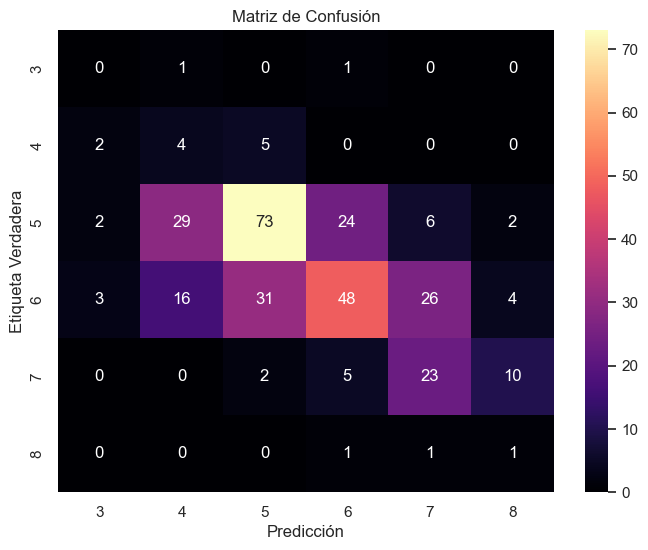

In [775]:
# Llamamos a la función con las etiquetas verdaderas y predichas
plot_confusion_matrix(y_test, best_SVC_RSKF.predict(X_test_scaled), best_SVC_RSKF.classes_)

Interpretación de resultados de modelos SVC:

- Métrica de rendimiento obtenida:
    - Conjunto TRAIN:
        - StratifiedKFold: `ROC-AUC=0.803`
        - RepeatedStratifiedKFold: `ROC-AUC=0.809`
    - Conjunto TEST:
        - StratifiedKFold: `ROC-AUC=0.799`
        - RepeatedStratifiedKFold: `ROC-AUC=0.803`
    - NOTA: al tratarse de un clasificador multiclase, el ROC-AUC obtenido es la media de los valores de ROC-AUC para cada clase. Analizando los valores de ROC-AUC global obtenidos, no se aprecia overfitting en el modelo debido a que los valores obtenidos en TEST son algo inferiores a los de TRAIN.

- Curvas ROC-AUC multiclase:
    - Al igual que con los modelos RandomForest, se observa como las clases minoritarias tienen curvas más inestables debido a la presencia de menos instancias para formar la curva. Esto sugiere la necesidad de más muestras de las clases minoritarias para una mejor clasificación.
    - En términos generales, los valores de ROC-AUC obtenidos en cada clase son aceptables y ligeramente inferiores a los obtenidos con RandomForest.

- Matriz de confusión multiclase:
    - En la matriz de confusión se observa claramente como el modelo está sesgado a predecir correctamente las clases mayoritarias (5 y 6) e incorrectamente las minoritarias (3, 4, 7 y 8). En comparación con los modelos RandomForest, los modelos SVC son menos exactos en la predicción de las clases mayoritarias.
 

<u>**Conclusiones finales**</u>
- Los modelos RandomForest generalizan mejor los resultados debido a que los valores de métrica ROC-AUC son superiores a los obtenidos en los modelos SVC tanto en el conjunto TRAIN como TEST.
- Se ha observado mayor sensibilidad en la elección de hiperparámetros mediante GridSearch en los modelos RandomForest en comparación con los modelos SVC. Esto sugiere la necesidad de una estrategia robusta de validación cruzada para los modelos RandomForest.
- Se han realizado varias acciones para tratar de paliar el efecto negativo del desbalanceo de clases obteniendo un resultado con margen de mejora:
    - Se ha considerado la estratificación de clases en la división de conjunto TRAIN y TEST.
    - Se ha indicado explícitamente el balanceo de clases en los modelos mediante el hiperparámetro `class_weight="balanced"`.
    - Se ha empleado `ROC-AUC One vs Rest` como métrica de evaluación dado que esta métrica no depende de valores absolutos, sino de las tasas de verdaderos positivos y falsos positivos de cada clase, manejando el desbalanceo de clases mejor que otras métricas como accuracy.
- Como posibles mejoras, se podría plantear la creación de instancias sintéticas mediante upsampling o SMOTE con el propósito de reducir el efecto de desbalanceo agresivo que presenta este dataset.

### EJERCICIO 2

Sobre el dataset del ejercicio anterior, realizar al menos 2 transformaciones de reducción de dimensionalidad sobre el Dataset utilizando un mismo algoritmo (p.e. PCA). Evaluar las diferencias de entrenar un modelo de clasificación (como los utilizados en el ejercicio anterior) con todo el Dataset, o con el Dataset reducido a diferentes dimensiones. Graficar los resultados y evaluar el tiempo de computación de entrenamiento de modelos. No olvides el efecto de escalar los datos previamente a aplicar el PCA. Justificar los resultados encontrados.

Graficar los resultados y comentar las diferencias de entrenar y evaluar el modelo sobre el Dataset transformado con sus dimensiones reducidas. Ejecuta diferentes visualizaciones de los datos tratados.

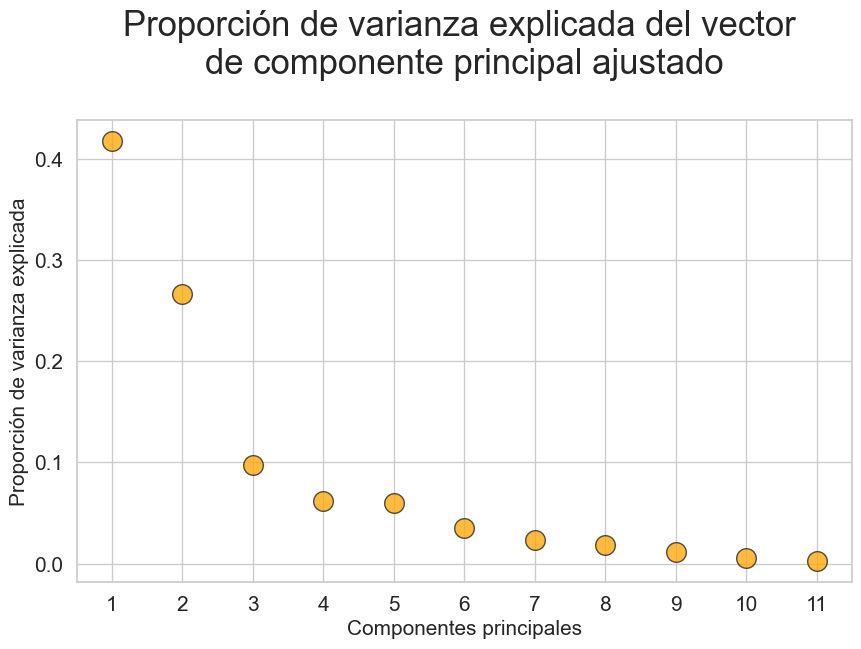

Proporciones de varianza explicada del vecor de componente principal ajustado: [0.42 0.27 0.1  0.06 0.06 0.04 0.02 0.02 0.01 0.01 0.  ]


In [828]:
from sklearn.decomposition import PCA

# Instanciamos clase PCA
pca = PCA(n_components=None)

# Ajustamos objeto PCA con el conjunto TRAIN escalado
pca.fit(X_train_scaled)

# Graficamos la proporción de varianza explicada por las componentes principales del dataset
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
            s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Proporción de varianza explicada del vector \nde componente principal ajustado\n",fontsize=25)
plt.xlabel("Componentes principales",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Proporción de varianza explicada",fontsize=15)
plt.show()

print(f'Proporciones de varianza explicada del vecor de componente principal ajustado: {np.round(pca.explained_variance_ratio_,2)}')

Interpretación de resultados:

En la figura de arriba se muestra los porcentajes de cada componente principal que explican la varianza total del dataset `winequality-red.csv`. Por ejemplo, la primera componente explica el 42% de la varianza y la segunda componente el 27%. Por lo tanto, únicamente las dos principales componentes del dataset explican el 69% de la varianza total en los datos.

A la vista de los resultados, a continuación se va a realizar una comparativa en términos de rendimiento del modelo y coste computacional para los siguientes tres casos:

1) Modelo **RandomForest** con optimización de hiperparámetros mediante **GridSearchCV** y **sin reducción de dimensionalidad**
2) Modelo **RandomForest** con optimización de hiperparámetros mediante **GridSearchCV** y con reducción de dimensionalidad a **2 componentes principales** (69% de la varianza total explicada)
3) Modelo **RandomForest** con optimización de hiperparámetros mediante **GridSearchCV** y con reducción de dimensionalidad a **5 componentes principales** (82% de la varianza total explicada)

In [836]:
# Generamos el conjunto TRAIN y TEST para cada uno de los escenarios planteados
# Escenario 1: sin reducción de dimensionalidad
X_train_scaled_PCA_None = X_train_scaled
X_test_scaled_PCA_None = X_test_scaled

# Escenario 2: reducción a 2 componentes principales
pca_2 = PCA(n_components=2)
X_train_scaled_PCA_2 = pca_2.fit_transform(X_train_scaled)
X_test_scaled_PCA_2 = pca_2.transform(X_test_scaled)

# Escenario 3: reducción a 5 componentes principales
pca_5 = PCA(n_components=5)
X_train_scaled_PCA_5 = pca_5.fit_transform(X_train_scaled)
X_test_scaled_PCA_5 = pca_5.transform(X_test_scaled)

# Listamos los conjuntos
X_train_scaled_list = [X_train_scaled_PCA_None, X_train_scaled_PCA_2, X_train_scaled_PCA_5]
X_test_scaled_list = [X_test_scaled_PCA_None, X_test_scaled_PCA_2, X_test_scaled_PCA_5]

In [838]:
# Definimos malla de hiperparámetros para optimización mediante GridSearchCV
hyperparam_grid_RF = {
                    'n_estimators':[10, 100, 500, 1000, 1500], # Número de árboles en el bosque
                    'max_depth': [10, 20, 30, None],  # Profundidad de cada árbol
                    'bootstrap': [True, False], # Si se usa muestreo con reemplazo o no
                    'class_weight': ['balanced'], # Pesos de las clases, útil en problemas desbalanceados
}

In [840]:
import time

# Instanciamos modelo Random Forest
model_RF = RandomForestClassifier(random_state=42)

# Iniciamos lista para guardar los modelos y tiempos de entrenamiento
models_list = []
times = []

for x in X_train_scaled_list:
    # Iniciamos cronómetro
    start_time = time.time()
    
    # Instanciamos GridSearchCV con StratifiedKFold
    gs_cv_RF = GridSearchCV(estimator=model_RF,
                                param_grid=hyperparam_grid_RF,
                                cv=5,
                                scoring='roc_auc_ovr',
                                verbose=2,
                                n_jobs=-1,
                                return_train_score=True
    )

    # Entrenamos modelo con conjunto TRAIN aplicado distintos métodos PCA
    gs_cv_RF.fit(x, y_train)

    # Finalizamos cronómetro y listamos el tiempo
    end_time = time.time()
    times.append(end_time - start_time)

    # Guardamos resultados del modelo en la lista
    models_list.append(gs_cv_RF)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


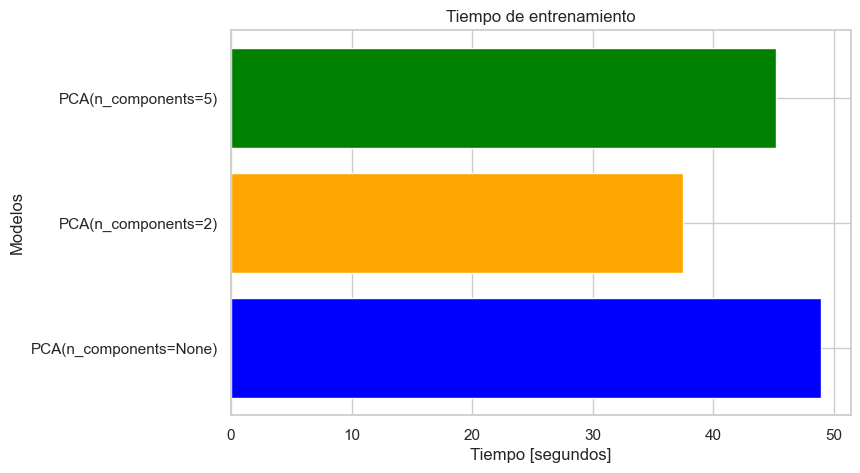

In [877]:
# Graficamos tiempos de ejecución de cada modelo
plt.figure(figsize=(8, 5))
plt.barh(['PCA(n_components=None)', 'PCA(n_components=2)', 'PCA(n_components=5)'],
        times,
        color=["blue", "orange", "green"])

# Personalizar etiquetas
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Modelos")
plt.title("Tiempo de entrenamiento")
plt.show()

In [847]:
# Mostramos los tiempos de computo de los distintos modelos entrenados
print(f'Tiempo de entrenamiento de modelo sin reducción de dimensionalidad = {times[0]:.02f} segundos.')
print(f'Tiempo de entrenamiento de modelo con reducción a 2 componentes principales = {times[1]:.02f} segundos.')
print(f'Tiempo de entrenamiento de modelo con reducción a 5 componentes principales = {times[2]:.02f} segundos.')

Tiempo de entrenamiento de modelo sin reducción de dimensionalidad = 48.94 segundos.
Tiempo de entrenamiento de modelo con reducción a 2 componentes principales = 37.46 segundos.
Tiempo de entrenamiento de modelo con reducción a 5 componentes principales = 45.21 segundos.


Verificamos si existe diferencias de los mejores hiperparámetros obtenidos entre los tres modelos entrenados con distintas reducciones de dimensionalidad:

In [858]:
# Mejores hiperparámetros del primer modelo
print('Mejores hiperparámetros del modelo sin reducción de dimensionalida:')
print(models_list[0].best_params_)

# Mejores hiperparámetros del segundo modelo
print('\nMejores hiperparámetros del modelo con 2 componentes principales:')
print(models_list[1].best_params_)

# Mejores hiperparámetros del tercer modelo
print('\nMejores hiperparámetros del modelo con 5 componentes principales:')
print(models_list[2].best_params_)

Mejores hiperparámetros del modelo sin reducción de dimensionalida:
{'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 30, 'n_estimators': 1500}

Mejores hiperparámetros del modelo con 2 componentes principales:
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 500}

Mejores hiperparámetros del modelo con 5 componentes principales:
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 1000}


Evaluamos score obtenido sobre el conjunto TRAIN con Cross-validation 10 folds sobre el conjunto train mediante métrica de rendimiento AUC:

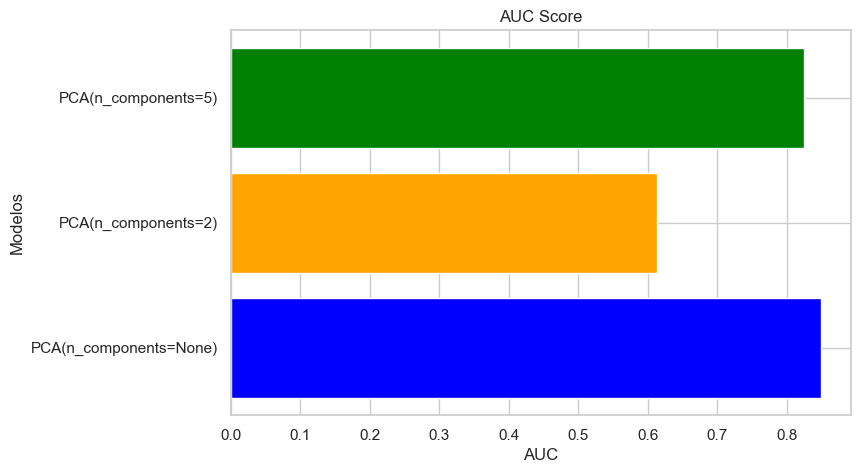

In [881]:
# Graficamos tiempos de ejecución de cada modelo
plt.figure(figsize=(8, 5))
plt.barh(['PCA(n_components=None)', 'PCA(n_components=2)', 'PCA(n_components=5)'],
        [model.best_score_ for model in models_list],
        color=["blue", "orange", "green"])

# Personalizar etiquetas
plt.xlabel("AUC")
plt.ylabel("Modelos")
plt.title("AUC Score")
plt.show()

In [869]:
print(f'AUC del modelo sin reducción de dimensionalida = {models_list[0].best_score_:.04f}')
print(f'AUC del modelo con 2 componentes principales = {models_list[1].best_score_:.04f}')
print(f'AUC del modelo con 5 componentes principales = {models_list[2].best_score_:.04f}')

AUC del modelo sin reducción de dimensionalida = 0.8495
AUC del modelo con 2 componentes principales = 0.6136
AUC del modelo con 5 componentes principales = 0.8247


In [889]:
from sklearn.metrics import classification_report

# Generamos las predicciones del primer modelo
y_pred_PCA_None = models_list[0].best_estimator_.predict(X_test_scaled_PCA_None)

# Generar el reporte del primer modelo
report = classification_report(y_test, y_pred_PCA_None)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.64      0.71      0.67       128
           7       0.74      0.50      0.60        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.43      0.38      0.40       320
weighted avg       0.66      0.68      0.66       320



In [891]:
# Generamos las predicciones del segundo modelo
y_pred_PCA_2 = models_list[1].best_estimator_.predict(X_test_scaled_PCA_2)

# Generar el reporte del segundo modelo
report = classification_report(y_test, y_pred_PCA_2)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.59      0.60      0.60       136
           6       0.55      0.66      0.60       128
           7       0.38      0.25      0.30        40
           8       1.00      0.33      0.50         3

    accuracy                           0.55       320
   macro avg       0.42      0.31      0.33       320
weighted avg       0.53      0.55      0.54       320



In [893]:
# Generamos las predicciones del tercer modelo
y_pred_PCA_5 = models_list[2].best_estimator_.predict(X_test_scaled_PCA_5)

# Generar el reporte del tercer modelo
report = classification_report(y_test, y_pred_PCA_5)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.77      0.75       136
           6       0.63      0.70      0.66       128
           7       0.60      0.45      0.51        40
           8       0.50      0.33      0.40         3

    accuracy                           0.67       320
   macro avg       0.41      0.38      0.39       320
weighted avg       0.64      0.67      0.65       320



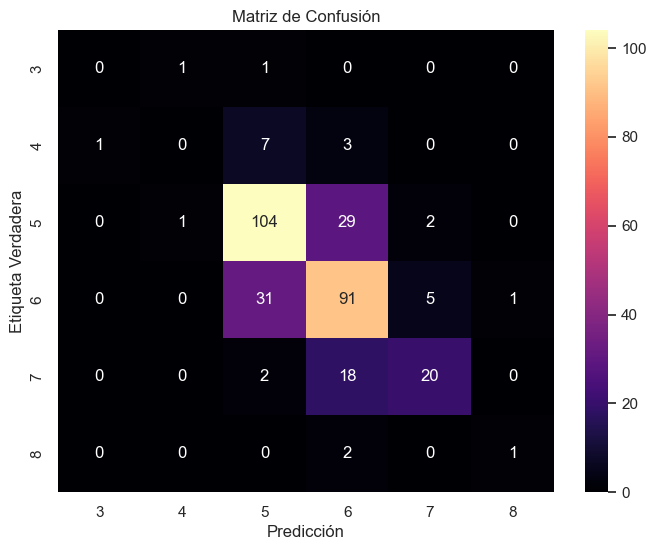

In [895]:
# Matriz de confusión del primer modelo
plot_confusion_matrix(y_test, y_pred_PCA_None, models_list[0].best_estimator_.classes_)

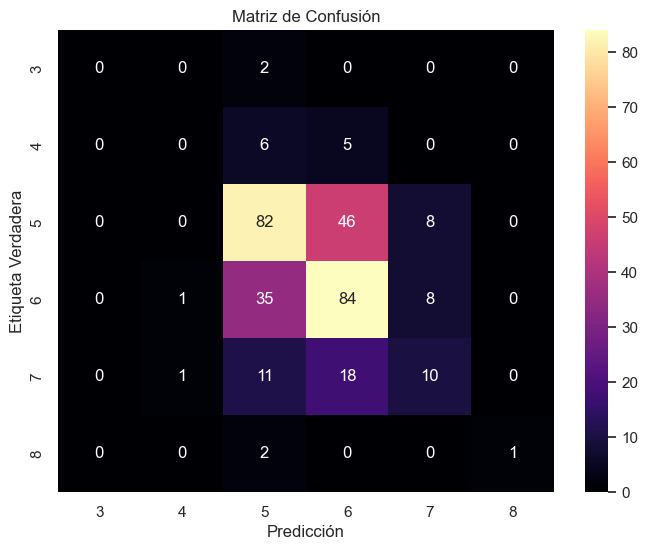

In [897]:
# Matriz de confusión del segundo modelo
plot_confusion_matrix(y_test, y_pred_PCA_2, models_list[1].best_estimator_.classes_)

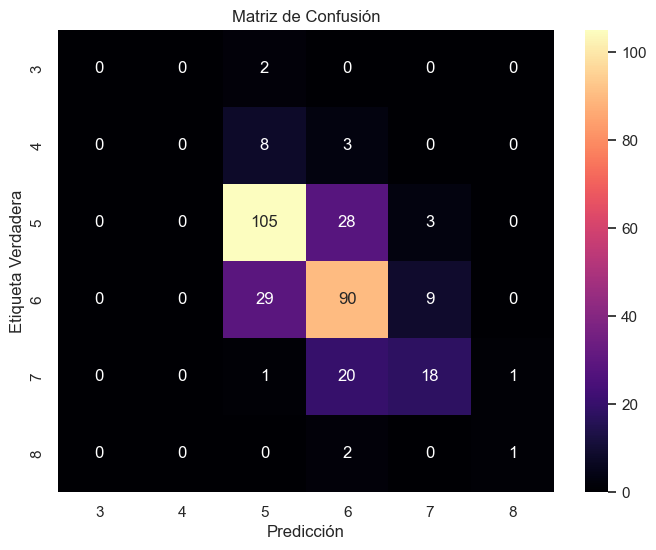

In [899]:
# Matriz de confusión del segundo modelo
plot_confusion_matrix(y_test, y_pred_PCA_5, models_list[2].best_estimator_.classes_)

Interpretación de resultados:

En este ejercicio, se han creado 3 modelos RandomForest con distinta reducción de dimensionalidad cada uno. El primero no se ha aplicado ningún tipo de reducción de dimensionalidad, manteniendo las 11 features normalizadas del dataset. El segundo, se ha reducido la dimensionalidad de 11 a 2 variables mediante PCA y por último, en el tercer modelo se ha reducido la dimensionalidad a 5 variables. A continuación, se indican las diferencias observadas por lo que se refiere al entrenamiento y a la evalucación de los modelos:

- Tiempo requerido para el entrenamiento:
    - Modelo 1 (sin reducción de dimensionalidad) = 49 segundos
    - Modelo 2 (2 dimensiones) = 37 segundos (optimización del 24.5% respecto al modelo sin reducción de dimensionalidad)
    - Modelo 3 (5 dimensiones) = 45 segundos (optimización del 8.2% respecto al modelo sin reducción de dimensionalidad)
    - Se observa una correlación positiva entre la reducción de dimensionalidad y el tiempo de entrenamiento. Es decir, al reducir la dimensionalidad, disminuye el tiempo de entrenamiento requerido. Esto parece lógico ya que al reducir la dimensión del dataset, el modelo debe aprender con una cantidad inferior de datos.
    
- Optimización de hiperparámetros:
    - En los 3 modelos se ha realizado una optimización de hiperparámetros mediante GridSearch. Se observa que la mejor combinación de hiperparámetros obtenida en cada modelo es distinta. En el primer ejercicio ya se ha identificado la sensibilidad de los modelos RandomForest ante el proceso de evaluación cruzada para la optimización de hiperparámetros. En este ejercicio se observa esta misma sensibilidad ante distintas configuraciones de reducción de sensibilidad.

- Resultados de métrica de rendimiento ROC-AUC One vs Rest:
    - Modelo 1 (sin reducción de dimensionalidad) = 0.85
    - Modelo 2 (2 dimensiones) = 0.61 (reducción de rendimiento del 28.2% respecto al modelo sin reducción de dimensionalidad)
    - Modelo 3 (5 dimensiones) = 0.82 (reducción de rendimiento del 3.5% respecto al modelo sin reducción de dimensionalidad)
    - Se observa una correlación positiva entre la reducción de dimensionalidad y rendimiento del modelo. Es decir, al reducir la dimensionalidad, el valor de ROC-AUC disminuye. Consecuentemente, hay que realizar un balance entre desempeño del modelo y coste computacional.

- Matriz de confusión:
    - Se sigue observando una predicción incorrecta de las clases minoritarias tanto en el modelo sin reducción de dimensionalidad como en los modelos con reducción de dimensionalidad. Tal como se ha remarcado en el Ejercicio 1, esta baja exactitud en las clases minoritarias se debe al gran desbalanceo que presenta el dataset.
    - Se observa que a medida que se reduce la dimensionalidad, la exactitud de las clases menoritarias decae. Este resultado está estrechamente relacionado con el anterior punto y es la causa por la que al reducir la dimensionalidad, el valor de ROC-AUC decae.

En resumen, al reducir la dimensionalidad se ha ganado en eficiencia de computo pero se ha empeorado en términos de rendimiento. Por lo tanto, este ejercicio nos sirve para tener en cuenta ambos aspectos en una situación real donde hay que sopesar tiempo y rendimiento.

### EJERCICIO 3

Sobre el dataset del ejercicio 1, utiliza Árboles de Decisión para graficar los parámetros más importantes del dataset escogido. Crea distintos árboles modificando los hiperparámetros de modelo más importantes (como p.e. el max_depth, min_samples_leaf... y otros). Evalúa 

Graficar los resultados de al menos 4 árboles, optimizando distintos tipos de parámetros

Con el propósito de analizar como impacta la elección de hiperparámetros en los modelos de Árboles de Decisión, en este ejercicio se partirá de un modelo tipo Árbol de Decisión inicializado con todos los hiperparámetros por defecto (a excepción del balance de clases debido al desbalanceo observado en el Ejercicio 1) y a continuación, se crearan 4 modelos a partir de este. En cada uno de los cuatro modelos se optimizará uno de los hiperparámetros más importantes de este tipo de clasificador:

- `max_depth`: máxima profundidad del árbol de decisión
- `min_samples_split`: número de muestras mínimo para realizar una división de nodo
- `min_samples_leaf`: número mínimo de muestras en un leaf nodo
- `max_features`: número máximo de features evaluadas en una división de nodo

In [1304]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Instanciamos el modelo base con todos los hiperparámetros por defecto a excepción del balanceo de clases
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Entrenamos el modelo con features normalizadas
dtc.fit(X_train_scaled, y_train)

# Obtenemos predicciones del modelo
y_pred = dtc.predict(X_test_scaled)
y_probs = dtc.predict_proba(X_test_scaled)

# Mostramos las métricas de evaluación del Árbol de Decisión con hiperparámetros por defecto
accuracy_modelo_0 = np.mean(cross_val_score(dtc, X_train_scaled, y_train, cv=5, scoring='accuracy'))
print(f'Exactitud del Árbol de Decisión sin ajuste de hiperparámetros: {accuracy_modelo_0:.04f}')

Exactitud del Árbol de Decisión sin ajuste de hiperparámetros: 0.5590


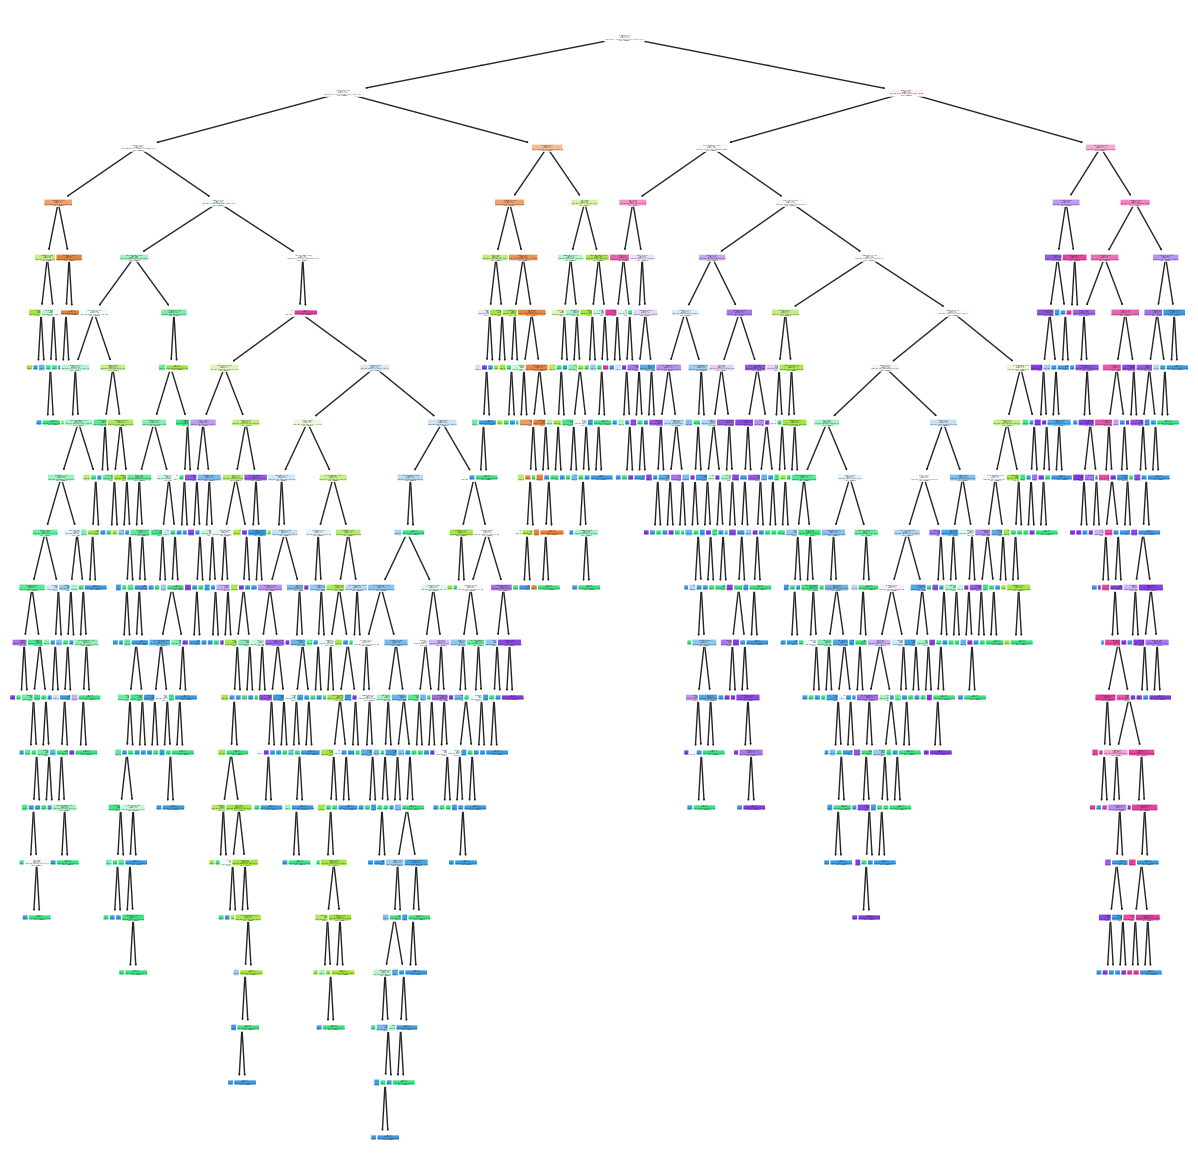

In [1506]:
from sklearn.tree import plot_tree

# Visualizamos árbol
plt.figure(figsize = (15, 15))
plot_tree(decision_tree=dtc,
          feature_names = X_train.columns,
          class_names =["Calidad 3", "Calidad 4", "Calidad 5", "Calidad 6", "Calidad 7", "Calidad 8"],
          filled = True,
          precision = 3,
          rounded = True)
plt.show()

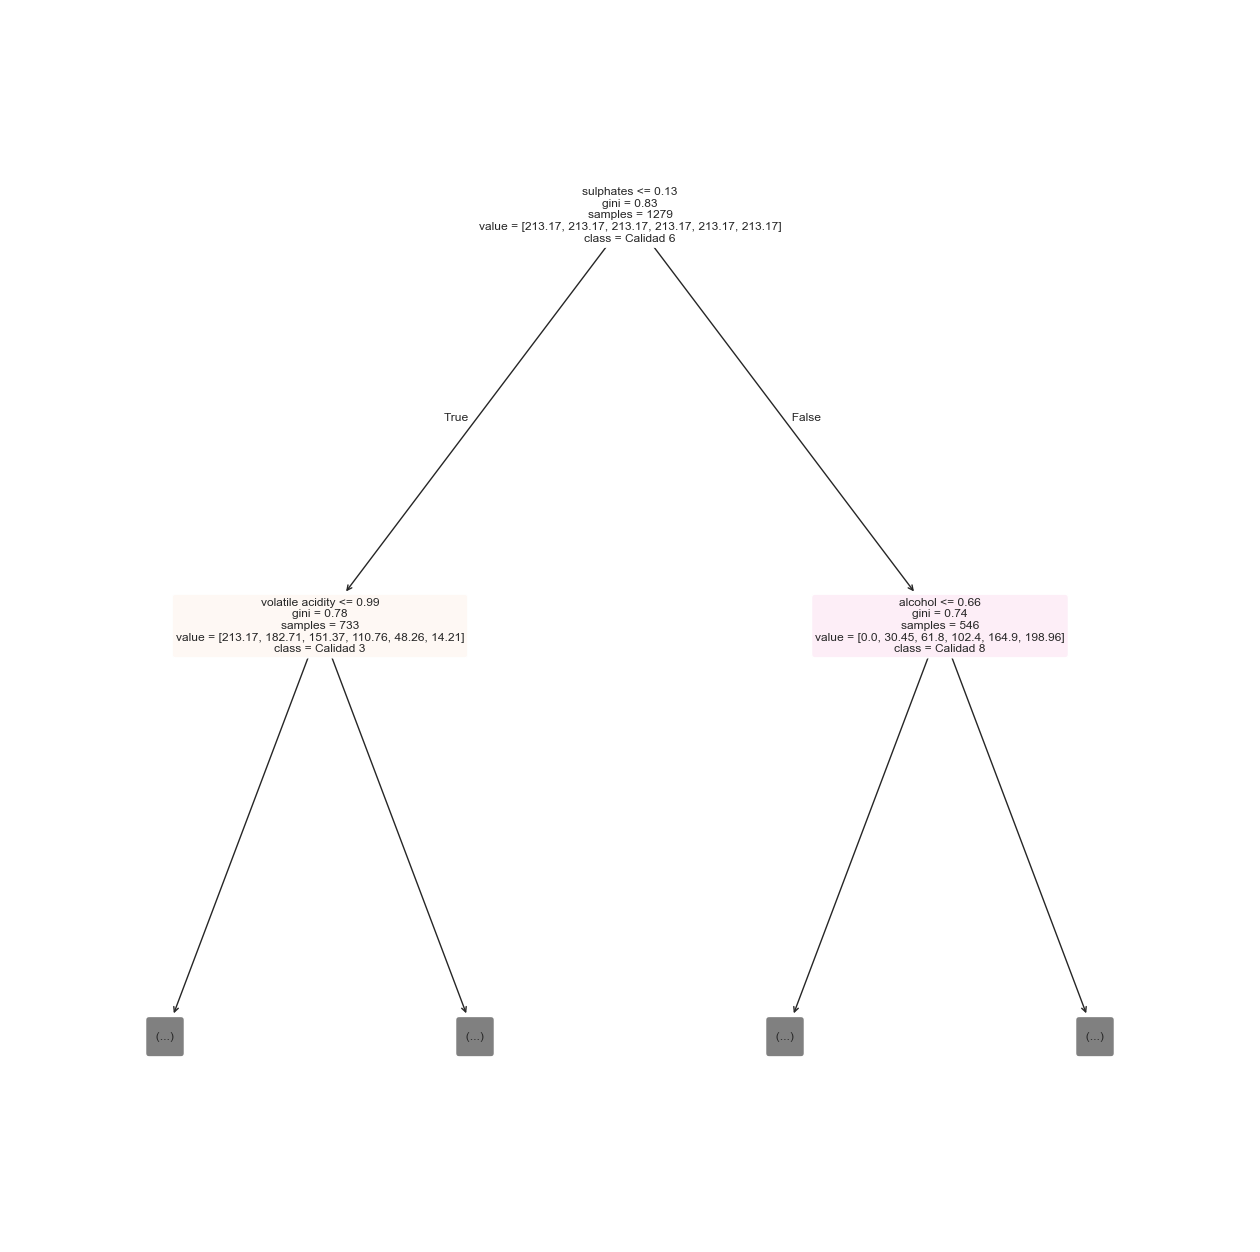

In [1508]:
# Visualizamos primeros nodos del árbol
plt.figure(figsize = (16, 16))
plot_tree(decision_tree=dtc,
          max_depth=1,
          feature_names = X_train.columns,
          class_names =["Calidad 3", "Calidad 4", "Calidad 5", "Calidad 6", "Calidad 7", "Calidad 8"],
          filled = True,
          precision = 2,
          rounded = True)
plt.show()

En la representación del árbol se puede observar como la feature `sulphates` es la que tiene mayor importancia del dataset al situarse en el nodo raíz.

**MODELO 1: Árbol de Decisión con optimización de hiperparámetro max_depth**

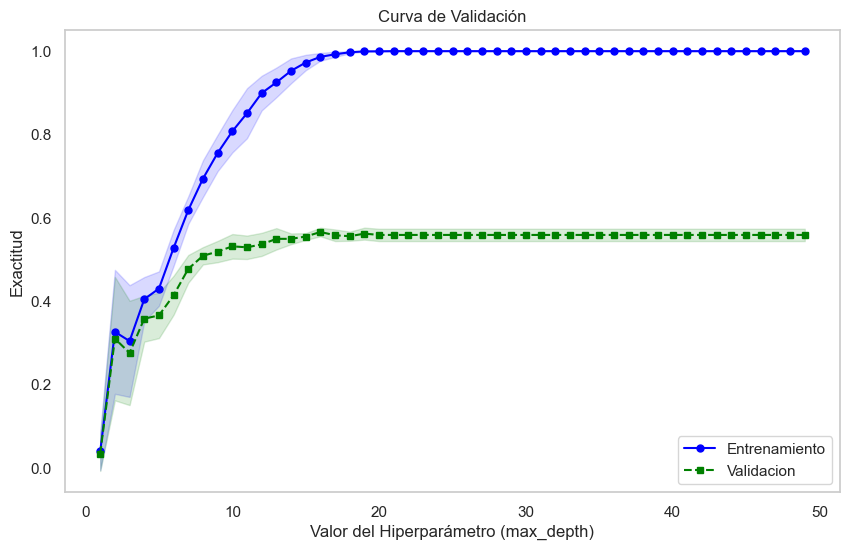

In [1307]:
from sklearn.model_selection import validation_curve

# Rango de valores del hiperparámetro a optimizar
param_range = np.arange(1, 50)

# Calcula la curva de validación para el hiperparámetro a optimizar
train_scores, test_scores = validation_curve(
    estimator=dtc,
    X=X_train_scaled,
    y=y_train,
    param_name='max_depth',  # Hiperparámetro a variar
    param_range=param_range,
    cv=5,
    scoring='accuracy',  # Métrica a evaluar
    n_jobs=-1
)

# Calcula las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotea la curva de validación
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validacion')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Curva de Validación')
plt.xlabel('Valor del Hiperparámetro (max_depth)')
plt.ylabel('Exactitud')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [1308]:
accuracy_modelo_1 = test_mean.max()
print(f'Exactitud máxima alcanzada: {accuracy_modelo_1:.04f}')
print(f'Hiperparámetro max_depth que maximiza la exactitud: {test_mean.argmax() + param_range[0]}')

Exactitud máxima alcanzada: 0.5661
Hiperparámetro max_depth que maximiza la exactitud: 16


La Exactitud máxima alcanzada es de 56.6% cuando `max_depth=16`. Como se puede observar, la exactitud alcanzada es 0.7 puntos porcentuales superior a la alcanzado con el valor del hiperparámetro por defecto `None` (el modelo no fija un límite de profundidad de árbol).

**MODELO 2: Árbol de Decisión con optimización de hiperparámetro min_samples_split**

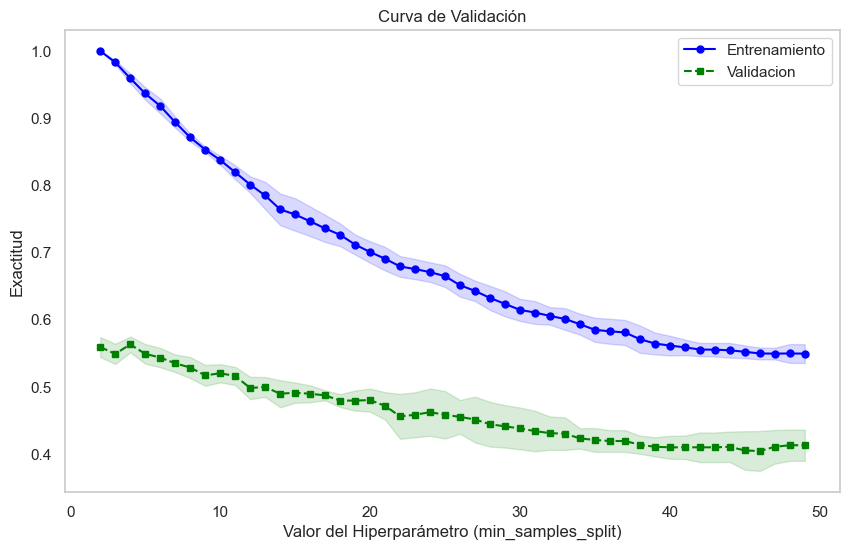

In [1313]:
# Rango de valores del hiperparámetro a optimizar
param_range = np.arange(2, 50)

# Calcula la curva de validación para el hiperparámetro a optimizar
train_scores, test_scores = validation_curve(
    estimator=dtc,
    X=X_train_scaled,
    y=y_train,
    param_name='min_samples_split',  # Hiperparámetro a variar
    param_range=param_range,
    cv=5,
    scoring='accuracy',  # Métrica a evaluar
    n_jobs=-1
)

# Calcula las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotea la curva de validación
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validacion')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Curva de Validación')
plt.xlabel('Valor del Hiperparámetro (min_samples_split)')
plt.ylabel('Exactitud')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [1314]:
accuracy_modelo_2 = test_mean.max()
print(f'Exactitud máxima alcanzada: {accuracy_modelo_2:.04f}')
print(f'Hiperparámetro min_samples_split que maximiza la exactitud: {test_mean.argmax() +param_range[0]}')

Exactitud máxima alcanzada: 0.5629
Hiperparámetro min_samples_split que maximiza la exactitud: 4


La Exactitud máxima alcanzada es de 56.3% cuando `min_samples_split=4`. Como se puede observar, la exactitud alcanzada es 0.4 puntos porcentuales superior a la alcanzado con el valor del hiperparámetro por defecto `2`.

**MODELO 3: Árbol de Decisión con optimización de hiperparámetro min_samples_leaf**

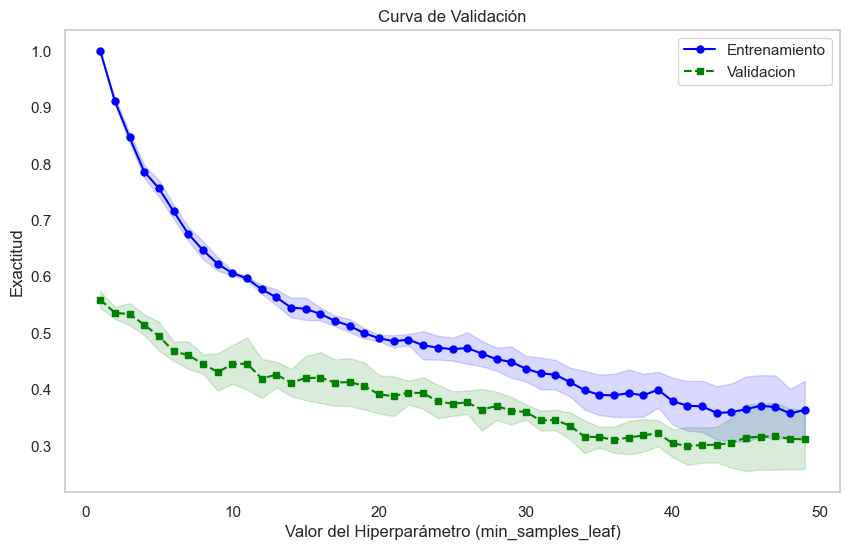

In [1319]:
# Rango de valores del hiperparámetro a optimizar
param_range = np.arange(1, 50)

# Calcula la curva de validación para el hiperparámetro a optimizar
train_scores, test_scores = validation_curve(
    estimator=dtc,
    X=X_train_scaled,
    y=y_train,
    param_name='min_samples_leaf',  # Hiperparámetro a variar
    param_range=param_range,
    cv=5,
    scoring='accuracy',  # Métrica a evaluar
    n_jobs=-1
)

# Calcula las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotea la curva de validación
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validacion')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Curva de Validación')
plt.xlabel('Valor del Hiperparámetro (min_samples_leaf)')
plt.ylabel('Exactitud')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [1320]:
accuracy_modelo_3 = test_mean.max()
print(f'Exactitud máxima alcanzada: {accuracy_modelo_3:.04f}')
print(f'Hiperparámetro min_samples_leaf que maximiza la exactitud: {test_mean.argmax() +param_range[0]}')

Exactitud máxima alcanzada: 0.5590
Hiperparámetro min_samples_leaf que maximiza la exactitud: 1


La Exactitud máxima alcanzada es de 55.9% cuando `min_samples_leaf=1`. En este caso, el valor máximo de exactitud se alcanza con el valor establecido por defecto en el modelo.

**MODELO 4: Árbol de Decisión con optimización de hiperparámetro max_features**

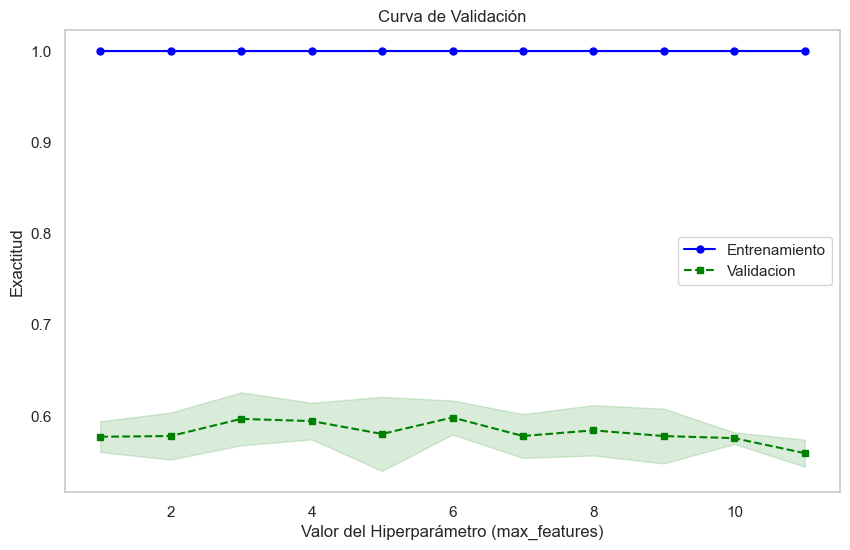

In [1325]:
# Rango de valores del hiperparámetro a optimizar
param_range = np.arange(1, X_train.shape[1] + 1)

# Calcula la curva de validación para el hiperparámetro a optimizar
train_scores, test_scores = validation_curve(
    estimator=dtc,
    X=X_train_scaled,
    y=y_train,
    param_name='max_features',  # Hiperparámetro a variar
    param_range=param_range,
    cv=5,
    scoring='accuracy',  # Métrica a evaluar
    n_jobs=-1
)

# Calcula las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotea la curva de validación
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validacion')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Curva de Validación')
plt.xlabel('Valor del Hiperparámetro (max_features)')
plt.ylabel('Exactitud')
plt.legend(loc='center right')
plt.grid()
plt.show()

In [1327]:
accuracy_modelo_4 = test_mean.max()
print(f'Exactitud máxima alcanzada: {accuracy_modelo_4:.04f}')
print(f'Hiperparámetro max_features que maximiza la exactitud: {test_mean.argmax() +param_range[0]}')

Exactitud máxima alcanzada: 0.5981
Hiperparámetro max_features que maximiza la exactitud: 6


La Exactitud máxima alcanzada es de 59.8% cuando `max_features=6`. Como se puede observar, la exactitud alcanzada es 3.9 puntos porcentuales superior a la alcanzado con el valor del hiperparámetro por defecto `None`. Es decir, por defecto, se consideran todas las features de la matriz de diseño (11 en este caso).

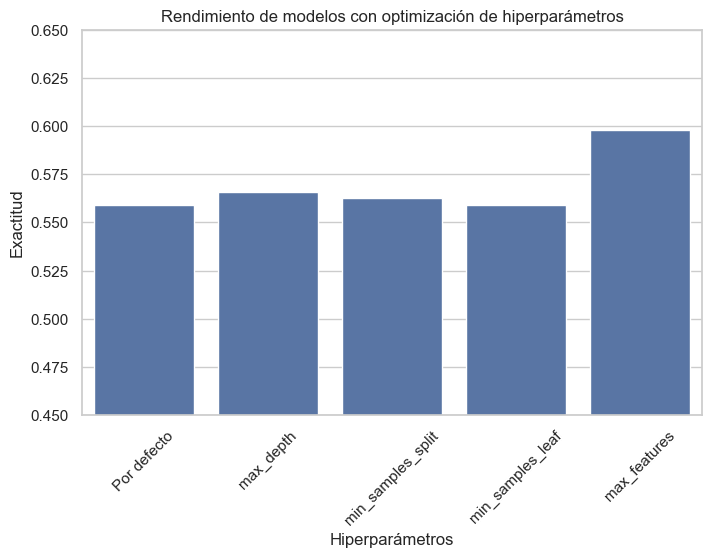

In [1513]:
# Graficamos exactitud obtenida en cada modelo
# Estilo de Seaborn
sns.set_theme(style="whitegrid")

# Listamos los valores de exactitud obtenidos
accuracy_list = [accuracy_modelo_0, accuracy_modelo_1, accuracy_modelo_2, accuracy_modelo_3, accuracy_modelo_4]

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=['Por defecto', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features'],
            y=accuracy_list)

# Etiquetas
plt.xlabel("Hiperparámetros")
plt.xticks(rotation=45)
plt.ylabel("Exactitud")
plt.ylim(0.45,0.65)
plt.title("Rendimiento de modelos con optimización de hiperparámetros")

# Mostrar
plt.show()

Interpretación de resultados:

El modelo con hiperparámetros por defecto ha obtenido una exactitud del 55.9%. Los modelos optimizados presentan valores de exactitud superiores al modelo por defecto a excepción del modelo con hiperparámetro `min_samples_leaf` cuyo parámetro por defecto coincide con el optimizado. Los modelos con hiperparámetros optimizados `max_depth` y `min_samples_split` presentan valores de exactitud muy ligeramente superiores en comparación con el modelo por defecto. Sin embargo, el modelo con hiperparámetro `max_features` optimizado presenta una mejora considerable respecto al modelo por defecto.

En este ejercicio se ha trabajado con la optimización de hiperparámetros llegando a la conclusión que la optimización individual de cada hiperparámetro repercute en una mejora del rendimiento del modelo. Sin embargo, combinar los hiperparámetros obtenidos en la optimización individual de cada uno de ellos no tiene por qué ser la mejor combinación. Es por ello que librerías como scikit-learn proveen de funciones como `GridSearchCV` y `RandomizedSearchCV` que automatizan todo el proceso de optimización de varios hiperparámetros simultáneamente.

Por otro lado, se observa que el rendimiento obtenido en este ejercicio por los modelos de Árboles de Decisión está muy por debajo en comparación con el obtenido con los modelos RandomForest sobre el mismo dataset. Esto sugiere que los modelos de Árboles de Decisión pueden ser una buena base comparativa, eficientes y de fácil interpretación. Sin embargo, incluso después de realizar optimización de hiperparámetros, pueden seguir sufriendo overfitting y usualmente deben ser ensamblados con otros árboles formando modelos RandomForest para obtener un mejor rendimiento.

### EJERCICIO 4

El fichero datos_pago_microcreditos.csv contiene 30000 transacciones bancarias relativas al pago o impago de microcreditos. El dataset consta de 62 dimensiones propietarias de las cuales el banco no ha proporcionado informacion por confidencialidad, a parte de su valor. La matriz de entrada se encuentra en x_train, e y_train contiene la etiqueta relativa a esa transaccion, un 1 indica que si se pagó el microcredito y un 0 que no se pagó.

Considera que el tamaño del dataset es lo suficientemente grande como para, dependiendo de los recursos de la maquina, poder tardar varias horas en entrenar modelos complejos. Usando verbose=4 durante el fit para la optimización de parámetros podras ver el tiempo que tarda cada fit. El valor del parámetro "verbose" es un número entero que indica el nivel de detalle de la información que se desea mostrar durante el entrenamiento del modelo.

Ejecuta el código inicial para estandarizar los datos y contesta las preguntas bajo este código.

In [1369]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data_file='datasets/datos_pago_microcreditos.csv'

pdl=pd.read_csv(data_file)

In [1373]:
pdl["payment"]=np.where(pdl["payment"]=="Success",1,0)

k=pdl.columns

for col in k:
    if pdl[col].dtype=='object':
        temp=pd.get_dummies(pdl[col],drop_first=True,prefix=col)
        pdl=pd.concat([pdl,temp],axis=1)
        pdl.drop([col],axis=1,inplace=True)


pdl.dropna(axis=0,inplace=True)


In [1375]:
pdl_train, pdl_test = train_test_split(pdl, test_size = 0.2,random_state=2)

#x_train=pdl_train.drop(["payment"],1)
x_train=pdl_train.drop(columns="payment")
y_train=pdl_train["payment"]

#x_test=pdl_test.drop(["payment"],1)
x_test=pdl_test.drop(columns="payment")
y_test=pdl_test["payment"]

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [1377]:
y_train

0        0
1        1
2        0
3        0
4        1
        ..
23995    0
23996    1
23997    0
23998    0
23999    1
Name: payment, Length: 24000, dtype: int32

Usando RandomSearchCV, identifica para un clasificador KNN el resultado óptimo usando como scoring de la optimizacion el area bajo la curva (roc_auc) y con 10 folds para la validacion cruzada. Presenta los parametros optimos y evalúa el clasificador optimo con esos parámetros. Obten la matriz de confusión del clasificador optimo anterior. ¿Cómo lees cada uno de los valores? ¿Qué valor de precision y recall tiene el clasificador optimizado con roc_auc?

Compara los resultados anteriores con un GradientBoostingClasifier, que es uno de los métodos de scikitlearn que suele producir resultados bastante adecuados. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate.¿qué learning rate produce un resultado optimo usando roc_auc como métrica?

Expón la matriz de confusión de los dos casos y coméntala.

In [1380]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos el modelo KNN
knn = KNeighborsClassifier()

In [1382]:
# Definimos malla de hiperparámetros para modelo KNN
hyperparam_grid = {'n_neighbors': np.arange(3, 51, 2),  # Probar vecinos impares entre 3 y 50
                   'weights': ['uniform', 'distance'],  # Peso uniforme o por distancia
                   'metric': ['euclidean', 'manhattan', 'minkowski']  # Distancia euclidiana, Manhattan o Minkowski
                  }

In [1396]:
from sklearn.model_selection import RandomizedSearchCV

# Modelo KNN
# Instanciamos RandomizedSearchCV con 10 folds para validación cruzada
gs = RandomizedSearchCV(estimator=knn,
                  param_distributions=hyperparam_grid,
                  cv=10,
                  scoring='roc_auc',
                  verbose=2,
                  n_jobs=-1,
                  return_train_score=True,
                  n_iter=200
)

# Entrenamos modelo con StratifiedKFold
gs.fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='roc_auc', verbose=2)

In [1398]:
# Instanciamos el mejor modelo KNN obtenido
best_knn = gs.best_estimator_

In [1400]:
# Mostramos los parámetros del mejor modelo KNN obtenido mediante RandomizedSearchCV
gs.best_params_

{'weights': 'distance', 'n_neighbors': 49, 'metric': 'manhattan'}

In [1402]:
# Obtenemos score (roc_auc) del modelo KNN para el conjunto TRAIN
gs.best_score_

0.815743345888421

In [1404]:
# Obtenemos predicciones y probabilidades de la clase positiva del conjunto TEST
y_pred = best_knn.predict(x_test)  # Predicciones finales
y_prob = best_knn.predict_proba(x_test)[:, 1]  # Probabilidad de la clase positiva

In [1405]:
from sklearn.metrics import classification_report

# Generar el reporte
report = classification_report(y_test, y_pred)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82      3762
           1       0.78      0.44      0.56      2238

    accuracy                           0.74      6000
   macro avg       0.76      0.68      0.69      6000
weighted avg       0.75      0.74      0.72      6000



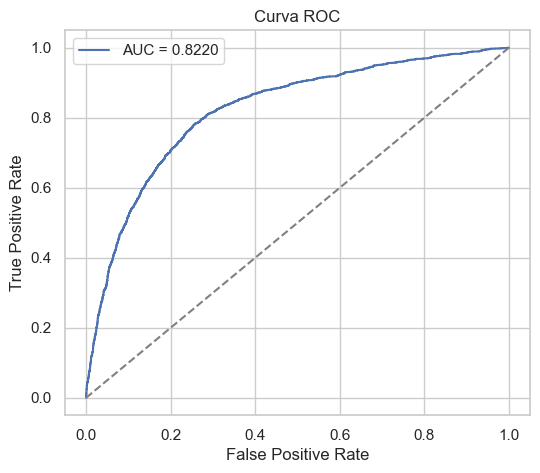

In [1408]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

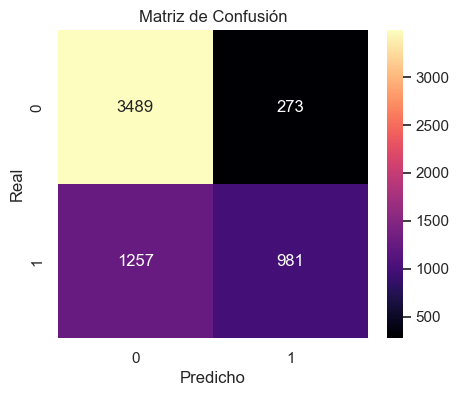

In [1410]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="magma", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [1412]:
from sklearn.metrics import precision_score, recall_score

# Calcular Precision y Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Mostrar resultados
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.7823
Recall: 0.4383


Interpretación de resultados:

- Hiperparámetros óptimos obtenidos mediante `RandomizedSearchCV`:
    - `metric="manhattan"`
    - `n_neighbors=49`
    - `weights="distance"`

- Métricas de rendimiento:
    - ROC-AUC = 0.816
    - Precision = 0.782
    - Recall =0.438

- Matriz de confusión:
    - Verdaderos Negativos (TN) = 3489
    - Falsos Negativos (FN) = 1257
    - Verdaderos Positivos (TP) = 981
    - Falsos Positivos (FP) = 273

Analizando las métricas de rendimiento y la matriz de confusión, se observa como el modelo clasifica mejor los casos negativos que los positivos o en otras palabras, el modelo es más exacto al predecir clientes que no van a pagar el microcrédito que en predecir los clientes que sí lo van a pagar. Partiendo de la base que ningún modelo tiene una exactitud perfecta, el sesgo de este modelo favorece a la industria bancaria. Esto es debido a que al banco le interesa más detectar con antelación aquellos clientes en riesgo de impago (verdaderos negativos) a costa de clasificar clientes con riesgo de impago pero que realmente sí son solventes (falsos negativos).

**Compara los resultados anteriores con un GradientBoostingClasifier, que es uno de los métodos de scikitlearn que suele producir resultados bastante adecuados. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate.¿qué learning rate produce un resultado optimo usando roc_auc como métrica?**

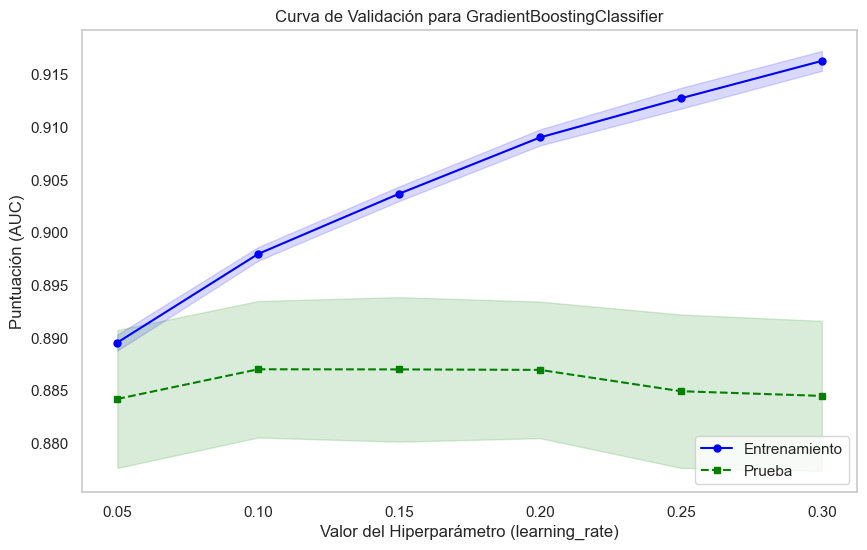

In [630]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import validation_curve

# Instanciamos el modelo GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Entrenamos el modelo con conjunto TRAIN
gbc.fit(x_train, y_train)

# Define los valores que deseas probar para hiperparámetro learning_rate
param_range = np.arange(0.05, 0.35, 0.05)

# Calcula la curva de validación para el hiperparámetro learning_rate
train_scores, test_scores = validation_curve(
    estimator=gbc,
    X=x_train,
    y=y_train,
    param_name='learning_rate',  # Hiperparámetro a variar
    param_range=param_range,
    cv=10,  # Cross-validation con 10 splits
    scoring='roc_auc',  # Métrica a evaluar
    n_jobs=-1
)

# Calcula las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotea la curva de validación
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Curva de Validación para GradientBoostingClassifier')
plt.xlabel('Valor del Hiperparámetro (learning_rate)')
plt.ylabel('Puntuación (AUC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

El mejor modelo `GradientBoostingClassifier` obtenido según la métrica `ROC-AUC` y que mejor generaliza es aquel con un `learning_rate=0.10`.

In [645]:
from sklearn.metrics import classification_report

# Instanciamos el modelo GradientBoostingClassifier con learning_rate=0.1
gbc = GradientBoostingClassifier(learning_rate=0.1, random_state=42)

# Entrenamos el modelo con conjunto TRAIN
gbc.fit(x_train, y_train)

# Obtenemos predicciones del conjunto TEST
y_pred = gbc.predict(x_test)

# Generar el reporte
report = classification_report(y_test, y_pred)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3762
           1       0.83      0.81      0.82      2238

    accuracy                           0.87      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.87      0.87      0.87      6000



A continuación, comparamos las matrices de confusión del modelo KNN y GBC:

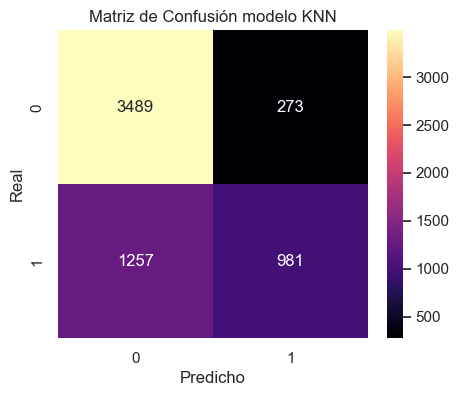

In [637]:
# Matriz de confusión de modelo KNN
# Obtenemos predicciones y probabilidades de la clase positiva del conjunto TEST
y_pred = best_knn.predict(x_test)  # Predicciones finales

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="magma", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión modelo KNN")
plt.show()

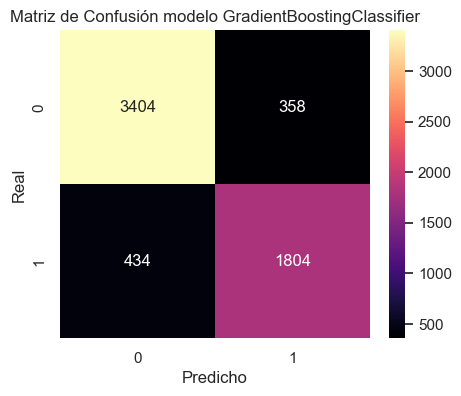

In [639]:
# Matriz de confusión de modelo GradientBoostingClassifier
# Obtenemos predicciones y probabilidades de la clase positiva del conjunto TEST
y_pred = gbc.predict(x_test)  # Predicciones finales

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="magma", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión modelo GradientBoostingClassifier")
plt.show()

Interpretación de resultados:

- El valor de learning_rate optimo para el modelo GradientBoostingClassifier es 0.10 ya que con este valor el modelo generaliza mejor (maximiza el valor de ROC-AUC en el conjunto de validación).
- Comparando la matriz de confusión del modelo GradientBoostingClassifier respecto al modelo de Árbol de Decisión, se observa como la exactitud al predecir la clase negativa es ligeramente inferior. Sin embargo, se observa una mejor sustancial en la clasificación de la clase positiva. Además, hay que tener en cuenta que en el modelo de Árbol de Decisión se ha realizado una optimización de varios hiperparámetros mediante RandomizedSearch, mientras que en el modelo GradientBoostingClassifier únicamente se ha optimizado el hiperparámetro de learning_rate. 

En conclusión, los resultados optenidos en el modelo GradientBoostingClassifier son mejores en términos generales en comparación con el modelo de Árbol de Decisión aún habiendo realizado un optimización mínima de hiperparámetros, llegando a la conclusión de la robustez de este tipo de modelo para tareas de clasificación.

### EJERCICIO 5

El dataset winequality-red.csv, utilizado en el ejercicio 1, es un dataset que contiene para los vinos de la denominación de origen Minho una serie de métricas donde se caracterizan diferentes tipos de vinos. Entre estos valores se encuentran el pH, su densidad, el nivel de alcohol o su calidad (potencialmente de 1 a 8). En este ejercicio usaremos este dataset para probar diferentes técnicas de clustering

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

myfile='datasets/winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

print(wine.head())
print(wine.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Utilizando solo las columnas "sulphates","alcohol","pH", y usando KMeans identifica el numero optimo de clusters para el conjunto de datos utilizando la "inertia_" para medir la compacidad de los clusteres.

Usando los "cluster_centers_" del clustering optimo. ¿qué dicen estos representantes de clase de cada cluster? ¿cuáles son los valores de los indices de Davies-Bouldin y de Silhouette para este conjunto de clusters?

**Utilizando solo las columnas "sulphates","alcohol","pH", y usando KMeans identifica el numero optimo de clusters para el conjunto de datos utilizando la "inertia_" para medir la compacidad de los clusteres.**

In [1911]:
# Guardamos en un dataframe las features
df = wine[['sulphates', 'alcohol', 'pH']]
df

,sulphates,alcohol,pH
0,0.56,9.4,3.51
1,0.68,9.8,3.20
2,0.65,9.8,3.26
3,0.58,9.8,3.16
4,0.56,9.4,3.51
...,...,...,...
1594,0.58,10.5,3.45
1595,0.76,11.2,3.52
1596,0.75,11.0,3.42
1597,0.71,10.2,3.57


In [1913]:
from sklearn.preprocessing import RobustScaler

# REDUCCIÓN DE DIMENSIONALIDAD

# Normalización de las features
X_scaled = RobustScaler().fit_transform(df)

# Reducción de dimensionalidad a 2 dimensiones mediante PCA
# Instanciamos objeto PCA y realizamos la reducción sobre las features normalizadas
pca = PCA(n_components=2, random_state=42)
X_scaled_pca = pca.fit_transform(X_scaled)

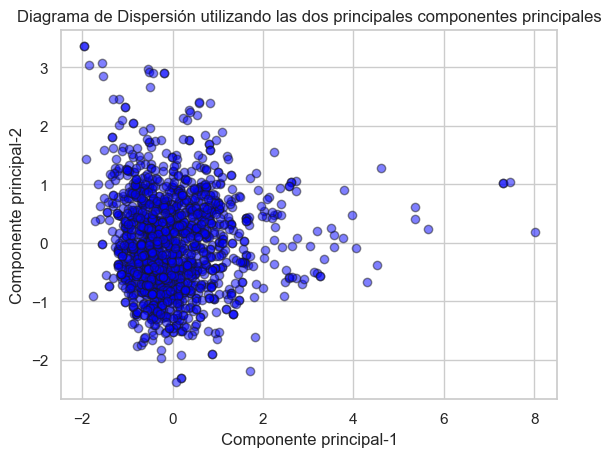

In [1915]:
# Diagrama de dispersión de las 2 componentes principales
x = X_scaled_pca[:,0]
y = X_scaled_pca[:,1]
plt.scatter(x, y, color="blue", alpha=0.5, edgecolors="k")
plt.xlabel("Componente principal-1")
plt.ylabel("Componente principal-2")
plt.title("Diagrama de Dispersión utilizando las dos principales componentes principales")
plt.grid(True)
plt.show()

La imagen de arriba representa el diagrama de dispersión del dataset reducido a 2 dimensiones mediante PCA. Se puede observar como la mayoría de los puntos están concentrados en una zona del gráfico. Por lo tanto, no se aprecian varios clusters bien definidos e independientes.

Se podría emplear modelos como DBSCAN para detección de outliers, es decir, detección de los puntos lejos de la acumulación observada. Sin embargo, emplear otros modelos de aprendizaje no supervisado como K-Means, se espera que el resultado sea dividir la acumulación de puntos en tantos clusters k como se indiquen.

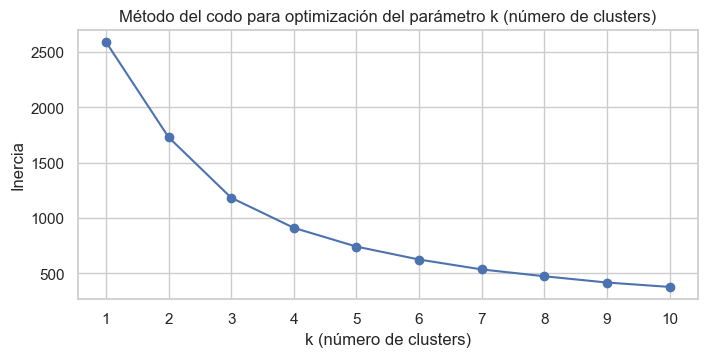

In [1918]:
from sklearn.cluster import KMeans

# Entrenamos varios modelos en función del número de clusters k
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled_pca) for k in range(1, 11)]

# Obtenemos las inercias de cada modelo
inertias = [model.inertia_ for model in kmeans_per_k]

# Graficamos la inercia en función del número de clusters
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("k (número de clusters)")
plt.xticks(range(1, 11))
plt.ylabel("Inercia")
plt.title('Método del codo para optimización del parámetro k (número de clusters)')
plt.show()

En el gráfico del método del codo no queda claro cuál es el número óptimo de clusters para este dataset. Podríamos dudar entre 3, 4 o 5 como valor de clusters óptimos. Ante esta situación, calcularemos más métricas de evaluación de modelos de aprendizaje no supervisado con el objetivo de determinar el número de clusters óptimos para este conjunto de datos.

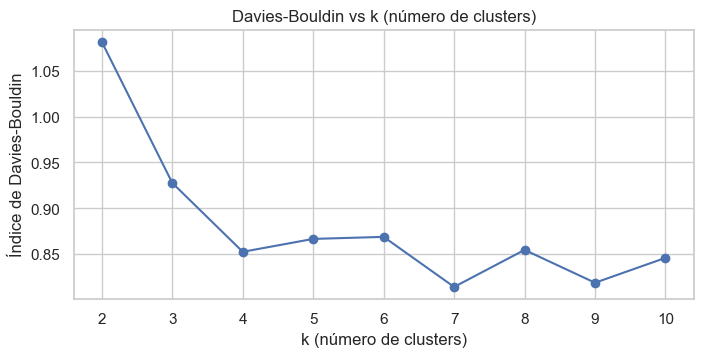

In [1921]:
from sklearn.metrics import davies_bouldin_score

# Entrenamos varios modelos en función del número de clusters k
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled_pca) for k in range(2, 11)]

# Obtenemos las inercias de cada modelo
davies_bouldin_indexes = [davies_bouldin_score(X_scaled_pca, model.labels_) for model in kmeans_per_k]

# Graficamos la inercia en función del número de clusters
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 11), davies_bouldin_indexes, "bo-")
plt.xlabel("k (número de clusters)")
plt.ylabel("Índice de Davies-Bouldin")
plt.title('Davies-Bouldin vs k (número de clusters)')
plt.show()

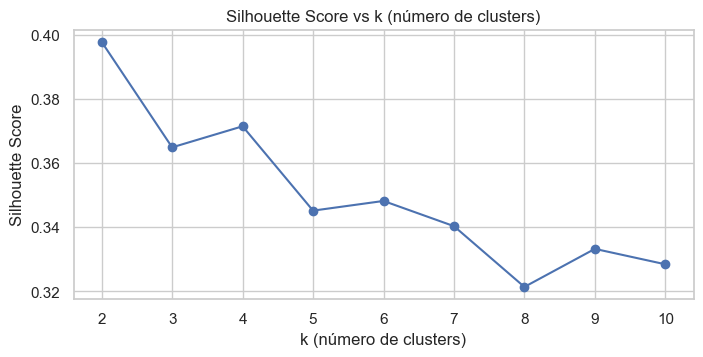

In [1922]:
from sklearn.metrics import silhouette_score

# Entrenamos varios modelos en función del número de clusters k
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled_pca) for k in range(2, 11)]

# Obtenemos las inercias de cada modelo
davies_bouldin_indexes = [silhouette_score(X_scaled_pca, model.labels_) for model in kmeans_per_k]

# Graficamos la inercia en función del número de clusters
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 11), davies_bouldin_indexes, "bo-")
plt.xlabel("k (número de clusters)")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Score vs k (número de clusters)')
plt.show()

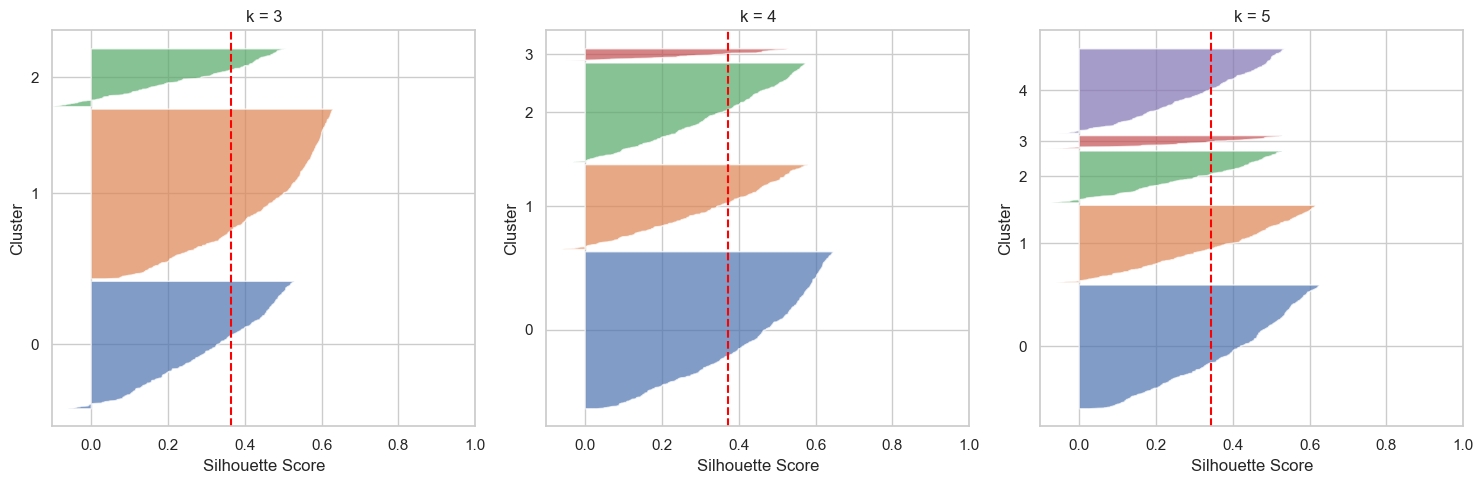

In [1925]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

# DIAGRAMA DE SILUETA

# Almacenamos dataset en una variable
X = X_scaled_pca.copy()

# Definir valores de K a probar
k_values = [3, 4, 5]

fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))
for idx, k in enumerate(k_values):
    ax = axes[idx]  # Seleccionar el subplot correspondiente
    
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calcular la silueta
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    ax.set_xlim([-0.1, 1])  # Silueta varía entre -1 y 1
    
    yticks = []  # Lista para guardar posiciones de los clusters en el eje Y

    for i in range(k):
        # Obtener los valores de silueta de los puntos del cluster i
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Asignar un color diferente a cada cluster
        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
        
        # Guardar la posición para la etiqueta del cluster en el eje Y
        yticks.append((y_lower + y_upper) / 2)

        y_lower = y_upper + 10  # Espacio entre clusters

    # Personalizar el eje Y con los números de los clusters
    ax.set_yticks(yticks)  # Posicionar etiquetas en el centro de cada cluster
    ax.set_yticklabels(range(k))  # Poner solo el número del cluster

    ax.set_title(f"k = {k}")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Cluster")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")  # Línea roja = media silueta

plt.tight_layout()
plt.show()

Interpretación de resultados:

Con el propósito de identificar el número óptimo de clusters para el conjunto de datos, se ha obtenido las métricas de inercia (método del codo), índice de Davis-Bouldin, Silhouette Score y los diagramas de silueta en función del hiperparámetro k (número de clusters). Analizando conjuntamente los distintos gráficos, se determina que el número óptimo de clusters es 4 debido a los siguientes motivos:

- En el gráfico del método del codo que mustra la inercia del modelo en función del número de clusters no se puede determinar un número óptimo ya que la curva es suave y consecuentemente, la interpretación del "codo" es subjetiva. De todos modos, podemos acotar el valor del hiperparámetro entre 3, 4 o 5.
- De los 3 valores acotados en el método del codo (3, 4 y 5), obtenemos en el gráfico del índice de Davies-Bouldin que 4 es el número de clusters óptimos.
- Por lo que se refiere al gráfico del Silhouette Score, de nuevo, se obtiene que el número óptimo de clusters es 4.
- Finalmente, en los diagramas de silueta reforzamos la conclusión de que 4 es el número óptimo de clusters debido a que no se aprecia diferencia en cuanto a la longitud de las barras horizontales de los 3 gráficos y por otro lado, el Silhouette Score se maximiza en k=4.

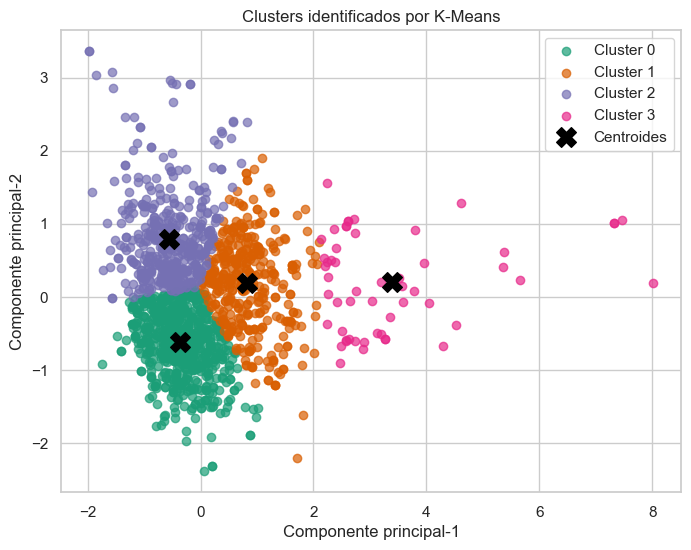

In [1928]:
# VISUALIZACIÓN DE LOS CLUSTERS EN EL DIAGRAMA DE DISPERSIÓN CON REDUCCIÓN DE DIMENSIONALIDAD

# Entrenamos el modelo con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled_pca)  # Etiquetas de clusters
centroids = kmeans.cluster_centers_  # Coordenadas de los centroides

# Graficamos los clusters
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap("Dark2")  # Colormap con colores distintos
for cluster_id in np.unique(labels):
    plt.scatter(X_scaled_pca[labels == cluster_id, 0], X_scaled_pca[labels == cluster_id, 1],
                color=cmap(cluster_id),
                label=f"Cluster {cluster_id}",
                alpha=0.7)

# Graficamos los centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="X", s=200, label="Centroides")


plt.xlabel("Componente principal-1")
plt.ylabel("Componente principal-2")
plt.title("Clusters identificados por K-Means")
plt.legend()
plt.grid(True)
plt.show()

Interpretación de resultados:

Tal como ya se había identificado en el primer diagrama de dispersión sin clusters dibujados, la acumulación de puntos ha sido dividido por 3 clusters. Por otro lado, los puntos más alejados de la acumulación han sido asignados al cuarto cluster.

Esta distribución de puntos supone un desafío para el modelo no supervisado de clustering ya que no existen clusters claramente separados.

De todos modos, esta vez, tenemos la suerte de que las features están etiquetadas y consecuentemente, podemos mostrar el diagrama de dispersión con las etiquetas reales y de este modo, comparar con los clusters generados:

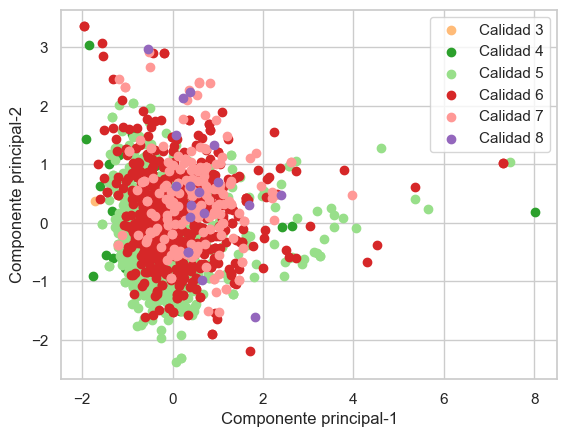

In [1931]:
# VISUALIZACIÓN DEl DIAGRAMA DE DISPERSIÓN CON REDUCCIÓN DE DIMENSIONALIDAD CON ETIQUETAS REALES
cmap = plt.get_cmap("tab20")  # Colormap con colores distintos
for cluster_id in np.unique(wine['quality']):
    plt.scatter(X_scaled_pca[wine['quality'] == cluster_id, 0], X_scaled_pca[wine['quality'] == cluster_id, 1],
                color=cmap(cluster_id),
                label=f"Calidad {cluster_id}")

plt.xlabel("Componente principal-1")
plt.ylabel("Componente principal-2")
plt.legend()
plt.grid(True)
plt.show()

En el diagrama de arriba se observa dificultades para agrupar las distintas calidades de vino. Recordemos que se trata de un dataset muy desbalanceado donde las clases mayoritarias son los vinos de calidad 5/6 y 7 en menor medida. Las demás calidades son prácticamente residuales.

Realizando un esfuerzo por tratar de comprender por qué K-Means ha realizado la configuración de clusters mostradas anteriormente, podríamos indicar que en la zona inferior de la acumulación de puntos predomina los vinos de calidad 5, en la parte derecha los de calidad 7 y en la parte superior los de calidad 6. Consecuentemente, K-Means está tratando de agrupar estos tres tipos de vinos en la agrupación de puntos.

**Usando los "cluster_centers_" del clustering optimo. ¿qué dicen estos representantes de clase de cada cluster? ¿cuáles son los valores de los indices de Davies-Bouldin y de Silhouette para este conjunto de clusters?**

In [1934]:
# Obtenemos los centroides de los 4 clusters
kmeans.cluster_centers_

array([[-0.35480505, -0.61685949],
       [ 0.82581133,  0.19102838],
       [-0.55174213,  0.79101039],
       [ 3.39336781,  0.1978777 ]])

In [1936]:
# ÍNDICE DE DAVIES-BOULDIN
# Calculamos índide de Davies-Bouldin
dbi = davies_bouldin_score(X_scaled_pca, kmeans.labels_)
print("Índice de Davies-Bouldin:", dbi)

Índice de Davies-Bouldin: 0.8525801213865646


In [1938]:
from sklearn.metrics import silhouette_score

# Calculamos el índice de silueta (silhouette score)
ss = silhouette_score(X_scaled_pca, kmeans.labels_)
print("Silhouette score:", ss)

Silhouette score: 0.3715375619700991


Interpretación de resultados:

- El atributo `cluster_centers_` devuelve las coordenadas X/Y de los centroides. Estos puntos representan la media de todos los puntos dentro de un cluster y sirven como referencia para definir la posición del cluster.

- Índice de Davies-Bouldin = 0.85
    - El índice de Davies-Bouldin mide la dispersión e independencia de los clusters, siendo 0 clusters muy compactos y totalmente separados. Dado que se ha obtenido un valor de 0.85, esto sugiere solapamiento y cierta dispersión de los clusters.

- Silhouette score = 0.37
    - El Silhouette score evalúa qué tan bien están asignados los puntos dentro de sus clusters, siendo -1 clusters mal definidos y 1 clusters compactos y bien definidos. Dado que se ha obtenido un valor de 0.37, esto sugiere la presencia de puntos próximos al centroide y puntos en las fronteras de los clusters. Una vez más, este resultado evidencia la acumulación de puntos visualizados en el diagrama de dispersión y separados por tres clusters.

### EJERCICIO 6

El fichero hr_train.cvs contiene una tabla sobre los empleados de una empresa. Entre otros incluye información de su nivel de satisfacción, de la última evaluación obtenida, del numero de proyecto en el que se encuentra, del número medio de horas por semana, del número de años que lleva en la compañía, si ha tenido o no un accidente en el trabajo, si se ha ido (left) de la compañia, si ha tenido una promocion en los ultimos 5 años, y por último su nivel salarial (descrito como medio, alto o bajo) y el departamento en que se encuentra (sales/technnical ...)

**El departamento de RRHH esta solicitando un clasificador que pueda predecir si alguien esta en riesgo de irse de la compañia para poder actuar  proactivamente.**

Notas:
- La columna "left" indica si alguien se ha ido de la compañia, es la "y" del problema.
- Las columnas "sales" y "salary" son alfanuméricas. La mayoría de clasificadores (aunque no todos) no trabajan bien con este tipo de variables y requieren valores numéricos. Dado el caso dispones de diferentes alternativas: (1) eliminar esas columnas y trabajar con el resto o (2) traducir esas columnas en columnas binarias - por ejemplo si "salary" tiene tres valores eliminar la columna original y sustituirla por tres columnas salary_low, salary_medium, salary_high donde se pondra un 1 en el tipo de salario y un 0 en las otras dos columnas restantes. Lo mismo para "sales", donde se transformara esa columna en tantas columnas como departamentos y un 1 en el departamento en que se encuentre el trabajador. Este es un preproceso muy tipico.

Nota de evaluación:

En este ejercicio más que el resultado final, se evaluarán los pasos y el razonamiento utilizado en cada decisión que se toma para la implementación del modelo. 

In [ ]:
import pandas as pd
import numpy as np

file1=r'datasets/hr_train.csv'

ci=pd.read_csv(file1)
ci.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In [1949]:
ci.left.value_counts()

left
0    7424
1    3075
Name: count, dtype: int64

In [1951]:
ci.salary.value_counts()

salary
low       5104
medium    4515
high       880
Name: count, dtype: int64

In [1953]:
ci.sales.value_counts()

sales
sales          2935
technical      1890
support        1556
IT              825
product_mng     639
marketing       614
hr              532
RandD           530
accounting      527
management      451
Name: count, dtype: int64

<u>Paso 1: PRESENTACIÓN DEL DATASET

In [1956]:
# Copiamos dataset en un dataframe para no modificar los datos originales
df = ci.copy()

# Eliminamos posibles registros duplicados en el dataset original
df.drop_duplicates(inplace=True)

In [1958]:
# Mostramos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9204 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     9204 non-null   float64
 1   last_evaluation        9204 non-null   float64
 2   number_project         9204 non-null   int64  
 3   average_montly_hours   9204 non-null   int64  
 4   time_spend_company     9204 non-null   int64  
 5   Work_accident          9204 non-null   int64  
 6   left                   9204 non-null   int64  
 7   promotion_last_5years  9204 non-null   int64  
 8   sales                  9204 non-null   object 
 9   salary                 9204 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 791.0+ KB


In [1960]:
# Mostramos dimensiones del dataset
df.shape

(9204, 10)

In [1962]:
# Verificamos presencia de valores NaN en el dataset
if df.isnull().sum().sum() == 0:
    print('No existen valores NaN en el dataset.')
else:
    print(f'Existen {df.isnull().sum().sum()} valores NaN en el dataset.')

No existen valores NaN en el dataset.


Presentación del dataset:

- El dataset `hr_train` registra 9 características de distintas de empleados y ex-empleados de una empresa y está creado con la intención de desarrollar un modelo de clasificación que prediga si alguno de los empleados actuales está en riesgo de irse de la compañía. El propio dataset contiene la variable dependiente `left` donde se indica si el empleado ha abandonado la compañia.

- Se han eliminado los registros duplicados en el dataset original.

- El dataset contiene un total de 9204 registros y 9 features:

    - Variables independientes (features):
        
        - `satisfaction_level` (variable numérica tipo float): nivel de satisfacción. Valores entre 0 y 1.
        - `last_evaluation` (variable numérica tipo float): puntaje de la última evaluación realizada. Valores entre 0 y 1.
        - `number_project` (variable numérica tipo integer): número de proyectos en el que se encuentra.
        - `average_montly_hours` (variable numérica tipo integer): promedio de horas trabajadas semanales.
        - `time_spend_company` (variable numérica tipo integer): años en la compañía.
        - `Work_accident` (variable numérica tipo integer binaria): si ha sufrido un accidente laboral.
        - `promotion_last_5years` (variable numérica tipo integer binaria): si ha tenido una promoción en los últimos 5 años.
        - `sales` (variable categórica): departamento al que pertenece.
        - `salary` (variable categórica): categoría del salario. Puede tomar valores de "low", "medium" y "high".
    
    - Variable dependiente (target):
        
        - `left` (variable numérica tipo integer binaria): indica si la persona se ha marchado de la compañía.
      
- El dataset no presenta valores NaN

<u>Paso 2: ANÁLISIS EXPLORATORIO DE LOS DATOS

In [1966]:
# Mostramos los principales estadísticos de las variables numéricas
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,0.623255,0.717321,3.805085,200.699587,3.418188,0.150913,0.254781,0.019231
std,0.243491,0.169776,1.183772,49.203148,1.393056,0.357983,0.435761,0.137343
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.460000,0.560000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.650000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


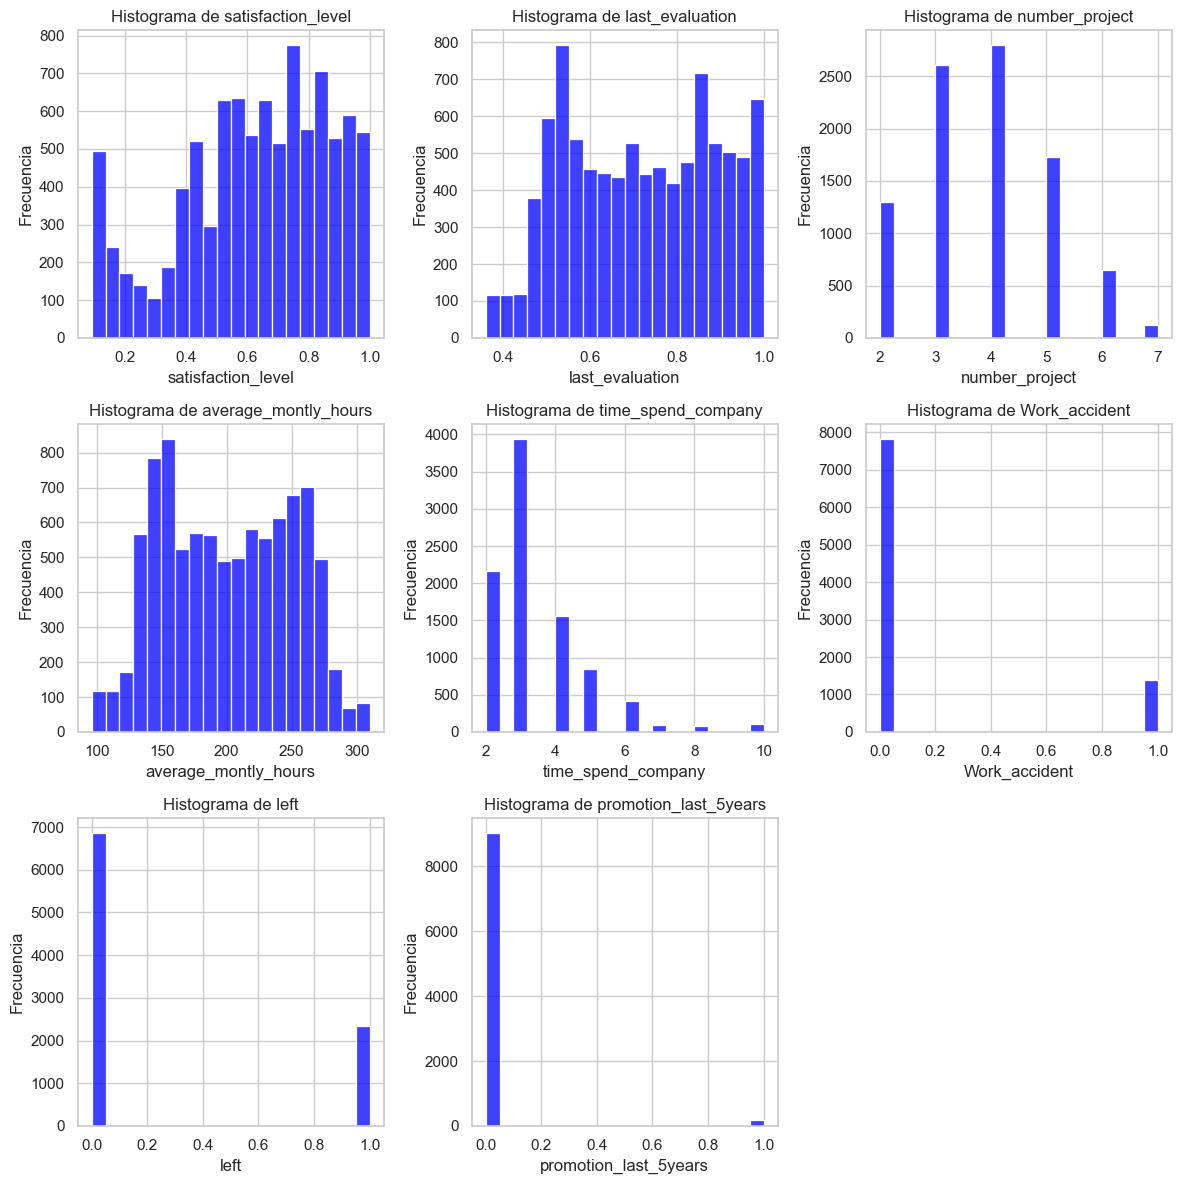

In [1968]:
# Creamos dataframe con las variable numéricas
df_num = df.select_dtypes(include=['number'])

# Graficamos histogramas de las variable numéricas
plot_histograms(df_num)

In [1970]:
# Verificamos condicion de normalidad en las features
check_normality(df_num)

Feature 'satisfaction_level' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'last_evaluation' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'number_project' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'average_montly_hours' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'time_spend_company' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'Work_accident' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'left' no se ajusta a una distribucion normal: p-valor = 0.00000
Feature 'promotion_last_5years' no se ajusta a una distribucion normal: p-valor = 0.00000


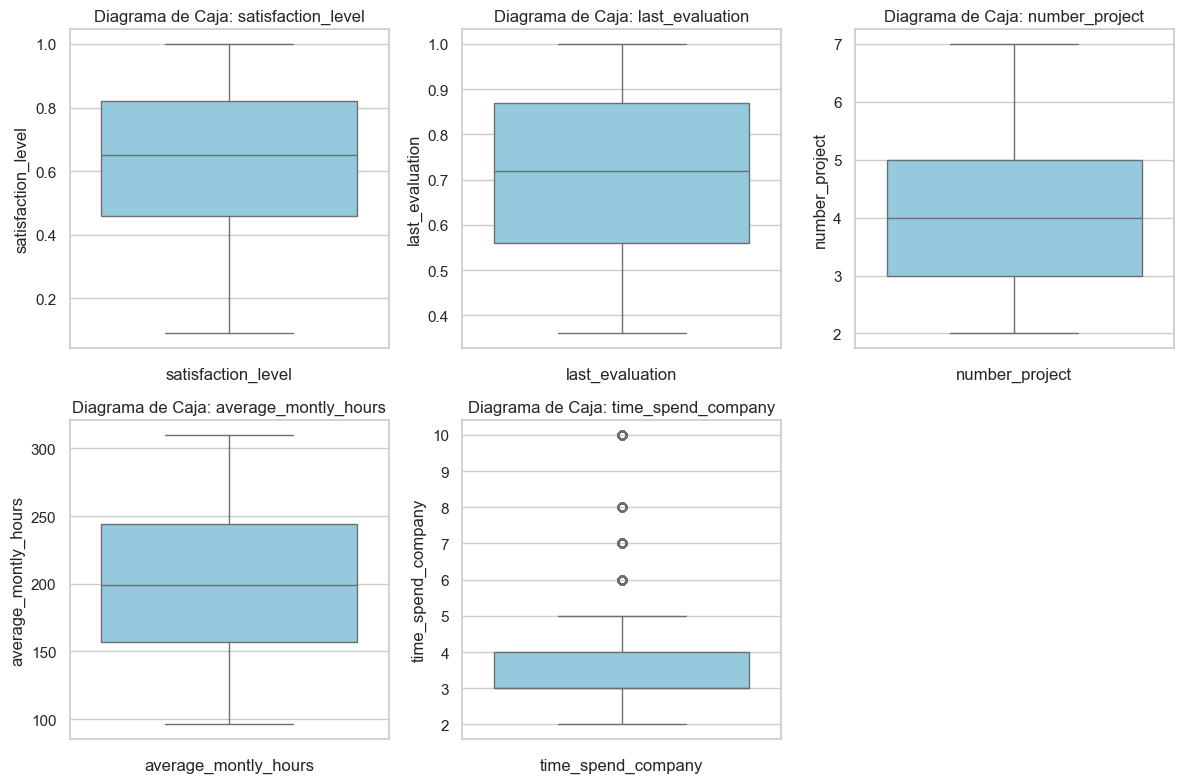

In [1972]:
# Graficamos diagramas de caja de las variables numéricas no binarias
plot_boxplots(df_num.drop(columns=['Work_accident', 'left', 'promotion_last_5years']))

In [1974]:
# Contamos el número de outliers presente en cada feature
outliers = {}
for feature in df_num.drop(columns=['Work_accident', 'left', 'promotion_last_5years']).columns.to_list():
    outliers[feature] = count_outliers(df_num.drop(columns=['Work_accident', 'left', 'promotion_last_5years']), feature)

print(outliers)

{'satisfaction_level': 0, 'last_evaluation': 0, 'number_project': 0, 'average_montly_hours': 0, 'time_spend_company': 692}


In [1976]:
# Contamos el número total de outliers
sum(outliers.values())

692

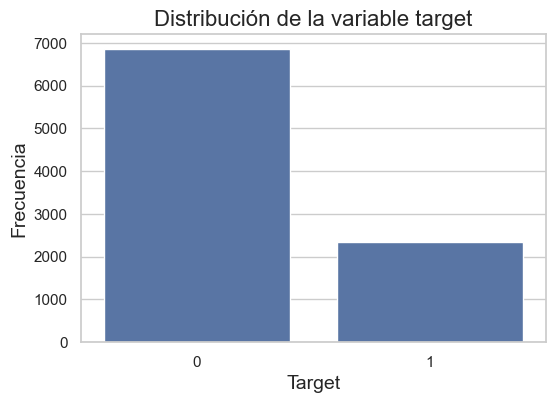

In [1978]:
# Graficamos diagrama de barras de la variable independiente

# Crear el diagrama de barras
plt.figure(figsize=(6, 4))
sns.countplot(x=df['left'])

# Etiquetas y título
plt.title('Distribución de la variable target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

In [1980]:
# Contamos el número de empleados y ex-empleados en el dataframe
df['left'].value_counts()

left
0    6859
1    2345
Name: count, dtype: int64

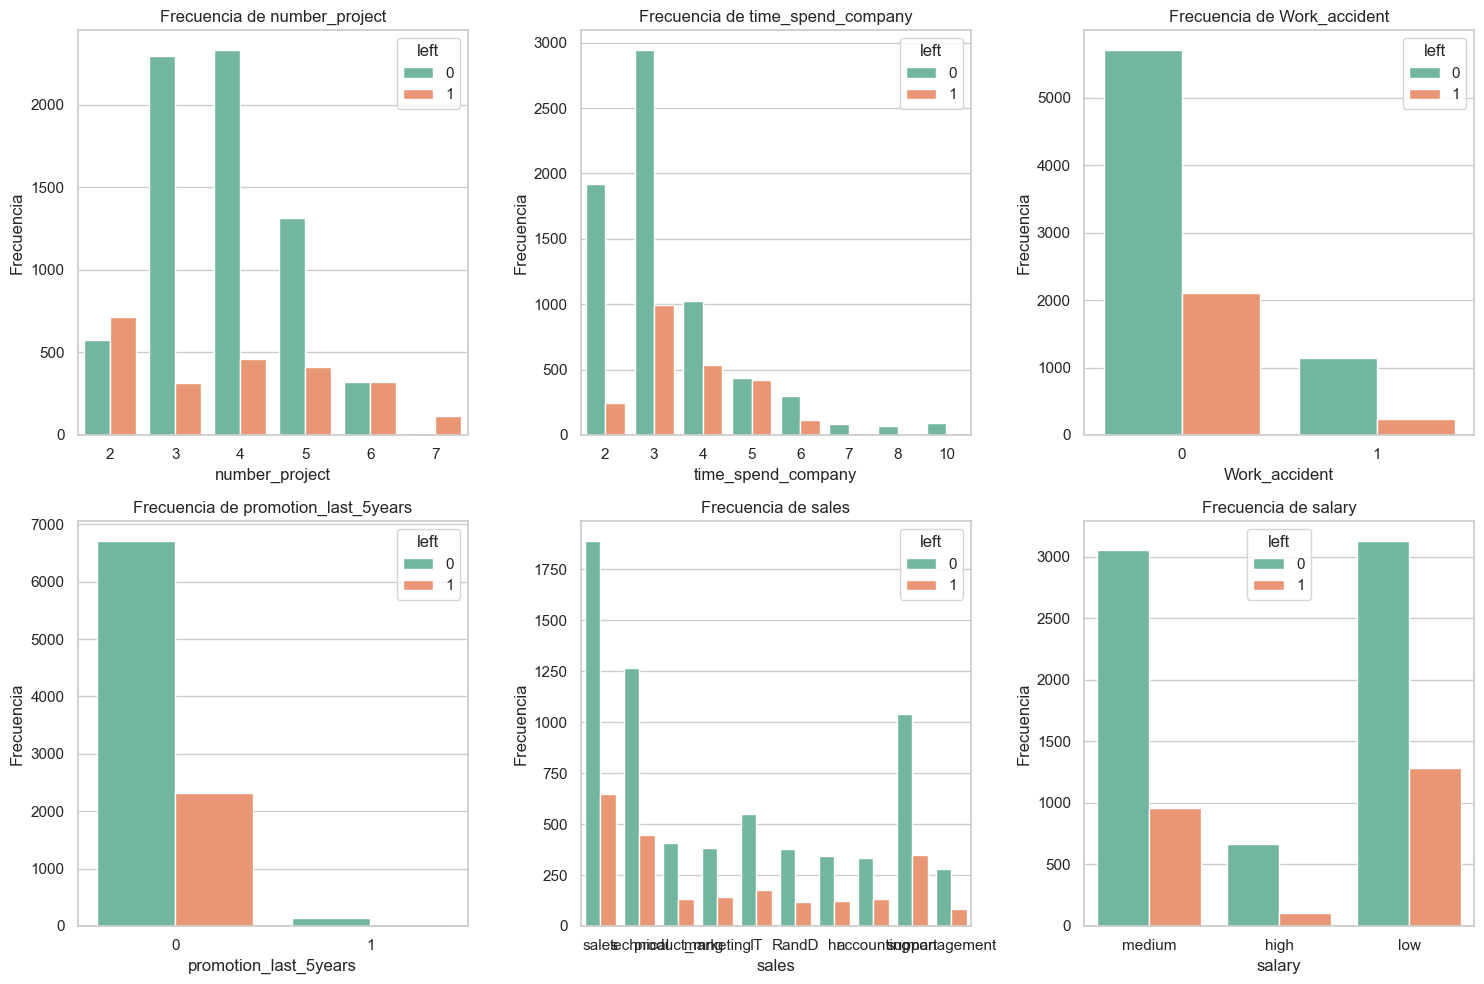

In [1982]:
import math

# Creamos diagramas bivariados en función de la variable dependiente

# Seleccionar variables categóricas para graficar
cat_cols = df[['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']].columns  # Variables independientes que queremos analizar
hue_col = df['left']  # Variable categórica para diferenciar

# Definir el número de columnas y filas dinámicamente
max_cols = 3  # Máximo de gráficos por fila
num_plots = len(cat_cols)  # Número total de gráficos
num_rows = math.ceil(num_plots / max_cols)  # Determinar el número de filas

# Crear figura con subgráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=max_cols, figsize=(5 * max_cols, 5 * num_rows))
axes = axes.flatten()  # Convertir en una lista para iterar fácilmente

# Crear los gráficos de barras para cada variable categórica
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue=hue_col, palette="Set2", ax=axes[i])
    axes[i].set_title(f'Frecuencia de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar gráficos vacíos si hay menos de max_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Conclusiones extraídas del análisis exploratorio:

- Las features presentan distintas escalas por lo que será necesario normalizar los valores para evitar que el modelo esté sesgado.
- Las features no se ajustan a una distribución normal y por lo tanto, no se puede emplear StandardScaler como método de normalización.
- Se observa la presencia de 692 valores outliers em la variable `time_spend_company`, indicando que una con más de 5 años en la compañía se trata de una situación atípica. Esto se puede deber a que la compañía lleva poco tiempo operando o que existe una alta rotación de personal. Por lo que se refiere a la normalización de los valores, se podría utilizar RobustScaler o MinMaxScaler ya que los outliers observados se encuentran en el mismo orden de magnitud respecto a los demás valores y por lo tanto, no se espera una compresión excesiva de los valores al emplear MinMaxScaler.
- Existe desbalanceo en la variable target. El dataset registra 6859 empleados que NO han abandonado la compañía y 2345 personas que SÍ han abandonado. Por lo tanto, dado que se puede considerar que el dataset es relativamente grande, se recomienda realizar downsampling con el propósito de balancear las clases y de este modo, evitar que el modelo esté sesgado hacia la clase mayoritaria. En este ejercicio es de especial interés equilibrar las clases ya que la clase minoritaria es la que nos interesa predecir.
- Es necesario codificar las variables categóricas antes de entrenar el modelo de clasificación.
- Análisis bivariado:
    - `number_project`: se observa que si un empleado tiene asignado un número pequeño de proyecto (2 proyectos) o un número alto (a partir de 6 proyectos), existe más probabilidad de que abandone la compañía de que se quede.
    - `time_spend_company`: la tasa de abandono de un empleado que lleva 7 años o más en la compañía es prácticamente nula. Además, se oberva que aproximadamente casi la mitad de los empleados abandonan la compañía a los 5 años.
    - `promotion_last_5years`: no se registran abandonos cuando un empleado ha sido promocionado en los últimos 5 años.
    - `salary`: proporcionalmente, las personas con salario alto son las que menos abandonan la compañía.

<u>Paso 3: TRANSFORMACIÓN Y LIMPIEZA DE LOS DATOS

In [1986]:
# Codificación de variables categóricas mediante One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['sales', 'salary'], prefix=['dept', 'salary'], prefix_sep='_', dtype=int)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.42,0.46,2,150,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.66,0.77,2,171,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.55,0.49,5,240,3,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.22,0.88,4,213,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.20,0.72,6,224,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


Se han codificado aquellas variables categóricas mediante el método de One-Hot Encoding.

In [1989]:
# Generamos matriz de diseño X y variable dependiente y
X = df_encoded.drop(columns='left')
y = df_encoded['left']

# Generamos los conjuntos TRAIN y TEST teniendo en cuenta el desbalanceo de la variable target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [1991]:
from imblearn.under_sampling import RandomUnderSampler

# Realizamos downsampling en el conjunto train para balancear las clases de la variable dependiente
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_downsampled, y_train_downsampled = undersampler.fit_resample(X_train, y_train)

In [1993]:
# Comparamos balanceo de clases en conjunto TRAIN original y downsampleado
print(y_train.value_counts())
print(y_train_downsampled.value_counts())

left
0    5487
1    1876
Name: count, dtype: int64
left
0    1876
1    1876
Name: count, dtype: int64


Se observa como al realizar downsampling, el conjunto TRAIN ya presenta el mismo número de personas que siguen y no siguen en la compañía. De este modo, el conjunto ya se encuentra balanceado.

Dado que el dataset es relativamente grande, nos podemos permitir realizar downsampling y de este modo, evitamos la creación de datos sintéticos mediante distintas técnicas como upsampling o SMOTE que pueden llegar a introducir ruido al modelo.

In [1996]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos mediante el método MinMaxScaler

# Instanciamos el scaler
scaler = MinMaxScaler()

# Entrenamos el scaler con el conjunto TRAIN y normalizamos el conjunto TRAIN
X_train_downsampled_scaled = scaler.fit_transform(X_train_downsampled)

# Normalizamos el conjunto TEST
X_test_scaled = scaler.transform(X_test)

<u>Paso 4: MODELADO</u>

Creamos modelo GBC para clasificar si un empleado va a abandonar la compañía.

In [2044]:
from sklearn.ensemble import GradientBoostingClassifier

# Instanciamos el modelo GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

In [2046]:
# Definimos malla de hiperparámetros para modelo GBC
hyperparam_grid_GBC = {
    "n_estimators": [20, 50, 100, 200],  # Número de árboles en el ensamble
    "learning_rate": [0.05, 0.1, 0.2],  # Tasa de aprendizaje
    "max_depth": [3, 5, 10],  # Profundidad máxima de cada árbol
    "min_samples_split": [2, 5, 10],  # Mínimas muetras para dividir un nodo
    "min_samples_leaf": [1, 3, 5],  # Mínimas muetras en una hoja
    "max_features": ["sqrt", "log2", None]  # Número de features consideradas en cada split
}

In [2048]:
# Instanciamos GridSearchCV
gs_cv_GBC = GridSearchCV(estimator=gbc,
                            param_grid=hyperparam_grid_GBC,
                            cv=5,
                            scoring='recall',
                            verbose=2,
                            n_jobs=-1,
                            return_train_score=True
                            )

# Entrenamos modelo
gs_cv_GBC.fit(X_train_downsampled_scaled, y_train_downsampled)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100, 200]},
             return_train_score=True, scoring='recall', verbose=2)

In [2050]:
# Instanciamos los mejores modelos obtenidos mediante GridSearch
best_GBC = gs_cv_GBC.best_estimator_

<u>Paso 4: EVALUCIÓN

In [2053]:
# Obtenemos mejores parámetros del modelo
gs_cv_GBC.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [2057]:
# Obtenemos predicciones y probabilidades de la clase positiva del conjunto TEST
y_pred = best_GBC.predict(X_test_scaled)  # Predicciones finales
y_prob = best_GBC.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de la clase positiva

In [2059]:
from sklearn.metrics import classification_report

# Generar el reporte
report = classification_report(y_test, y_pred)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1372
           1       0.58      0.70      0.63       469

    accuracy                           0.79      1841
   macro avg       0.73      0.76      0.74      1841
weighted avg       0.81      0.79      0.80      1841



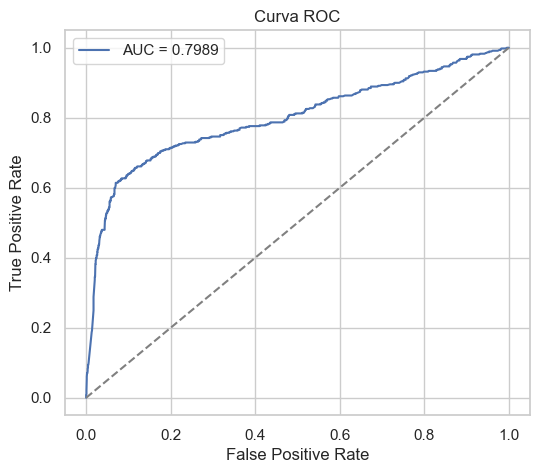

In [2061]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

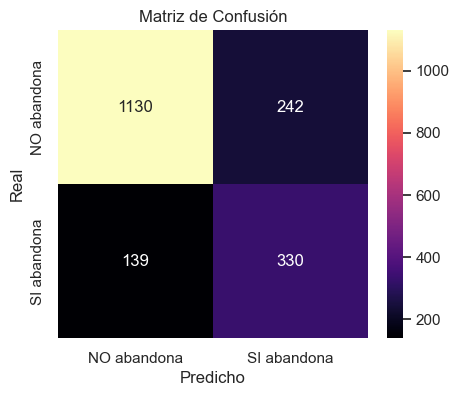

In [2063]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="magma", xticklabels=["NO abandona", "SI abandona"], yticklabels=["NO abandona", "SI abandona"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

Interpretación de resultados:

- Dado que el principal objetivo es predecir aquellos empleados en riesgo de abandono de la compañia, se ha establecido `recall` como métrica de rendimiento a optimizar en el proceso de GridSearch. De este modo, tratamos de maximizar el número de verdades positivos (personas en riesgo de abandonar la compañia) y minimizar los falsos negativos (el modelo predice que no abandonan la compañía pero realmente sí lo hacen). En contraposición, se aumenta la cantidad de falsos positivos o en otras palabras, personas que el modelo detecta que van a abandonar la compañía pero realmente no lo hacen. De este modo, se puede incentivar al departamento de RRHH al desarrollo de estrategias para mantener al personal en la compañía para aquellas personas en riesgo de abandono, aunque este grupo incluirá a gente que no quiere abandonar la compañia.

- A pesar de haber balanceado en conjunto de TRAIN mediante la técnica de downsampling, el modelo es más exacto a la hora de predecir la personas que no abandonan la compañía en comparación con la predicción de personas que sí abandonan la compañía. Una de las posibles razones se puede deber a que el conjunto de datos no contemple fielmente aquellas variables más influyentes que determinan a una persona para abandonar su puesto de trabajo.

- Recall 0.70 y precisión de 0.58 para la clase 1. Esto sugiere que el modelo detecta la mayoría de los casos positivos, pero con una cantidad de falsos positivos considerable.

- Macro-average recall de 0.76 y micro-average recall de 0.79. La evidencia numérica confirma lo mencionado en el segundo punto. El modelo es más exacto a la hora de predecir las personas que no abandonan en comparación con las personas que sí abandonan.